<a href="https://colab.research.google.com/github/phule1812/iurc2/blob/master/Analysis_mutual_influences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path/ 'dataset'

if image_path.is_dir():
  print(f'{image_path} directory already exists ... ')
else:
  print(f'{image_path} does not exist, creatin one ...')
  image_path.mkdir(parents = True, exist_ok = True)

# Download dataset
with open(data_path / 'dataset.zip', 'wb') as f:
  request = requests.get('https://github.com/phule1812/iurc2/raw/master/dataset.zip')
  print('Downloading dataset ...')
  f.write(request.content)

# Unzip dataset
with zipfile.ZipFile(data_path / "dataset.zip", 'r') as zip_ref:
  print('Unzipping dataset ...')
  zip_ref.extractall(image_path)

data/dataset directory already exists ... 
Unzipping dataset ...


In [ ]:
df_velocity_red_blue_green = pd.read_csv('data/dataset/dataset/velocity_red_blue_green.csv')
df_current_red_blue_green = pd.read_csv('data/dataset/dataset/current_red_blue_green.csv')

df_velocity_green_red_blue = pd.read_csv('data/dataset/dataset/velocity_green_red_blue.csv')
df_current_green_red_blue = pd.read_csv('data/dataset/dataset/current_green_red_blue.csv')

df_velocity_red_blue_green = df_velocity_red_blue_green.drop(columns = 'Unnamed: 0')
df_current_red_blue_green = df_current_red_blue_green.drop(columns = 'Unnamed: 0')

df_velocity_green_red_blue = df_velocity_green_red_blue.drop(columns = 'Unnamed: 0')
df_current_green_red_blue = df_current_green_red_blue.drop(columns = 'Unnamed: 0')

In [ ]:
df = pd.concat([df_velocity_red_blue_green, df_current_red_blue_green], axis = 1)

In [ ]:
df.head()

w3*  w1*  w2*          w3          w1          w2        I3        I1  \
0  200  200  200  144.692308  158.000000  141.967742  0.664165  0.488095   
1  200  200  225  147.673469  157.950000  157.680000  0.653846  0.425032   
2  200  200  250  143.500000  162.000000  181.465116  0.647837  0.394962   
3  200  200  275  145.800000  168.000000  205.434783  0.561859  0.400314   
4  200  200  300  150.362069  164.213115  221.282609  0.562024  0.392505   

         I2  
0  0.709957  
1  0.857287  
2  0.970985  
3  0.995885  
4  1.105096

# 1. Analysis of velocities and currents using 3D graph

## 1.1 Plot 3D graph showing the dependence of w3* (w3 = const) on w1* and w2*
* w1*, w2*, w3* - The given velicities* (w3* = const)
* w1, w2, w3 - The real velocities

In [ ]:
df_3d = df[['w1*', 'w2*', 'w3']]

In [ ]:
df_3d_plus = df_3d[(df_3d['w1*'] > 0) & (df_3d['w2*'] > 0)]

In [ ]:
df_3d_minus = df_3d[(df_3d['w1*'] < 0) & (df_3d['w2*'] < 0)]

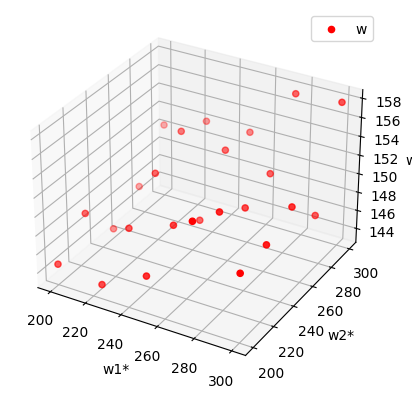

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
z = df_3d_plus['w3']
x = df_3d_plus['w1*']
y = df_3d_plus['w2*']

ax.scatter(x, y, z, label='w', c='r', marker='o')
ax.legend()
# Đặt tên cho các trục
ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
plt.show()

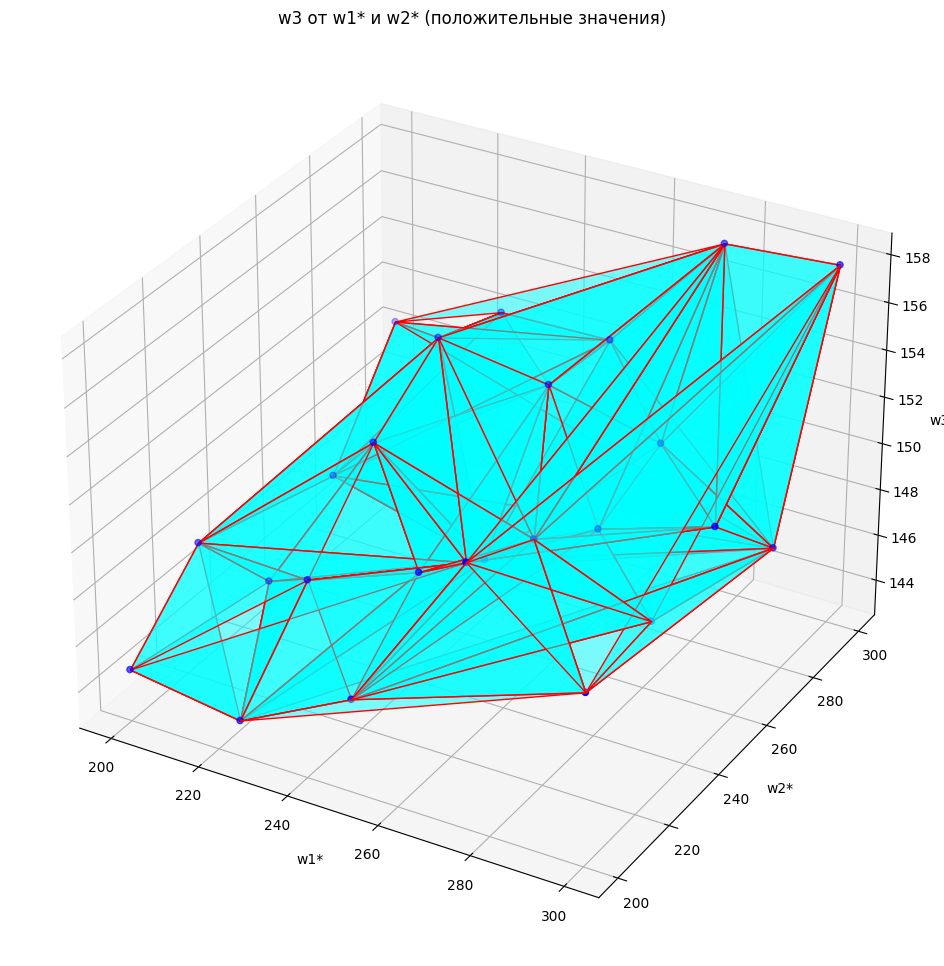

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
points = df_3d_plus.to_numpy()
tri = Delaunay(points)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')
for simplex in tri.simplices:
    vertices = points[simplex]
    ax.add_collection3d(Poly3DCollection([vertices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
ax.set_title('w3 от w1* и w2* (положительные значения)')
plt.show()

In [ ]:
# import pandas as pd
# import plotly.graph_objects as go
# from scipy.spatial import Delaunay

# fig = go.Figure()

# points = df_3d_plus.to_numpy()
# tri = Delaunay(points)

# fig.add_trace(go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], mode='markers', marker=dict(color='blue'), name='Points'))

# for simplex in tri.simplices:
#     vertices = points[simplex]
#     fig.add_trace(go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], color='cyan', opacity=0.5))

# fig.show()

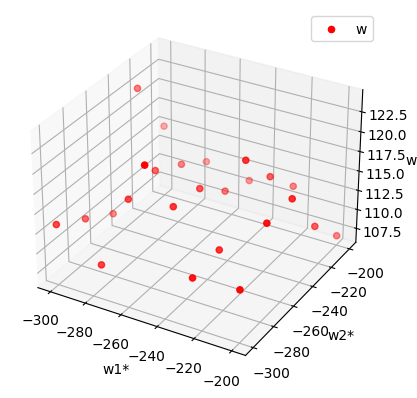

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
z = df_3d_minus['w3']
x = df_3d_minus['w1*']
y = df_3d_minus['w2*']

ax.scatter(x, y, z, label='w', c='r', marker='o')
ax.legend()
# Đặt tên cho các trục
ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
plt.show()

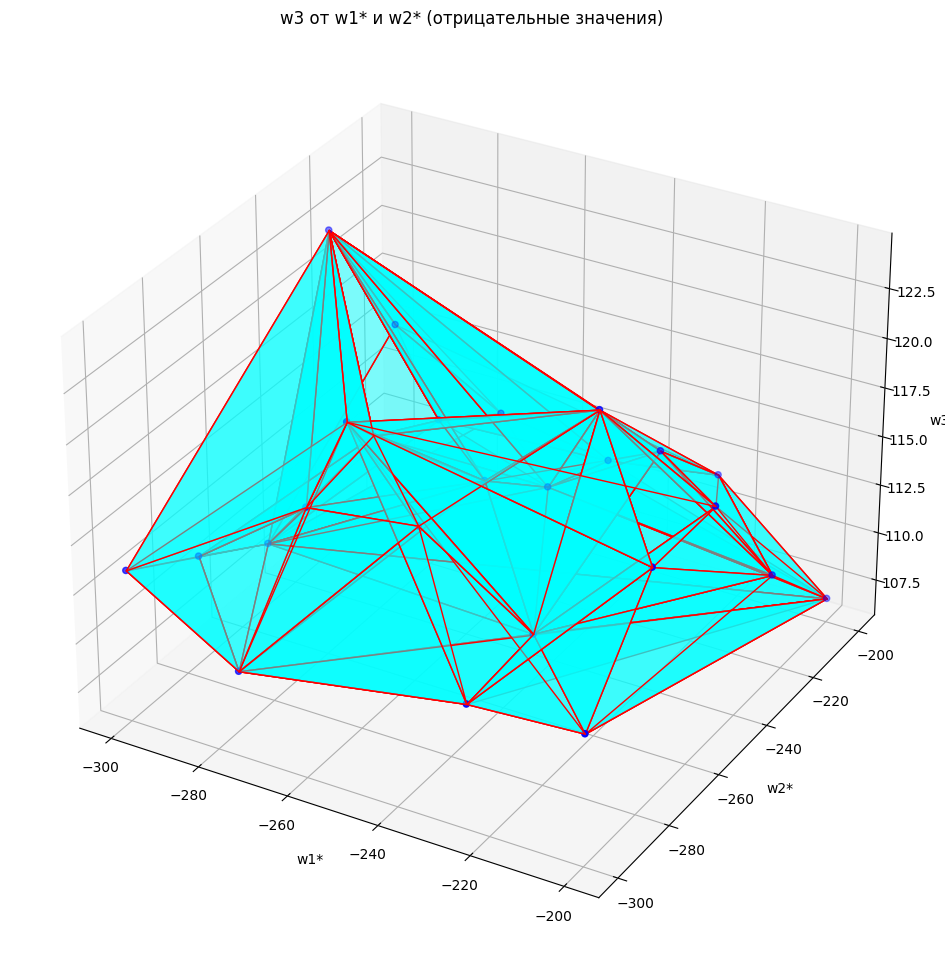

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
points = df_3d_minus.to_numpy()
tri = Delaunay(points)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')
for simplex in tri.simplices:
    vertices = points[simplex]
    ax.add_collection3d(Poly3DCollection([vertices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
ax.set_title('w3 от w1* и w2* (отрицательные значения)')
plt.show()

In [ ]:
# import pandas as pd
# import plotly.graph_objects as go
# from scipy.spatial import Delaunay

# fig = go.Figure()

# points = df_3d_minus.to_numpy()
# tri = Delaunay(points)

# fig.add_trace(go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], mode='markers', marker=dict(color='blue'), name='Points'))

# for simplex in tri.simplices:
#     vertices = points[simplex]
#     fig.add_trace(go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], color='cyan', opacity=0.5))

# fig.show()

## 1.2 Plot 3D graph showing the dependence of I3 (w3 = const) on w1* and w2*
* w1*, w2*, w3* - The given velicities* (w3* = const)
* I1, I2, I3 - The real currents in motors

In [ ]:
df_3d = df[['w1*', 'w2*', 'I3']]

In [ ]:
df_3d_plus = df_3d[(df_3d['w1*'] > 0) & (df_3d['w2*'] > 0)]
df_3d_minus = df_3d[(df_3d['w1*'] < 0) & (df_3d['w2*'] < 0)]

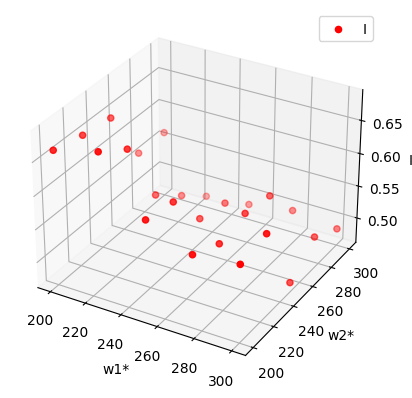

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
z = df_3d_plus['I3']
x = df_3d_plus['w1*']
y = df_3d_plus['w2*']

ax.scatter(x, y, z, label='I', c='r', marker='o')
ax.legend()
# Đặt tên cho các trục
ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('I3')
plt.show()

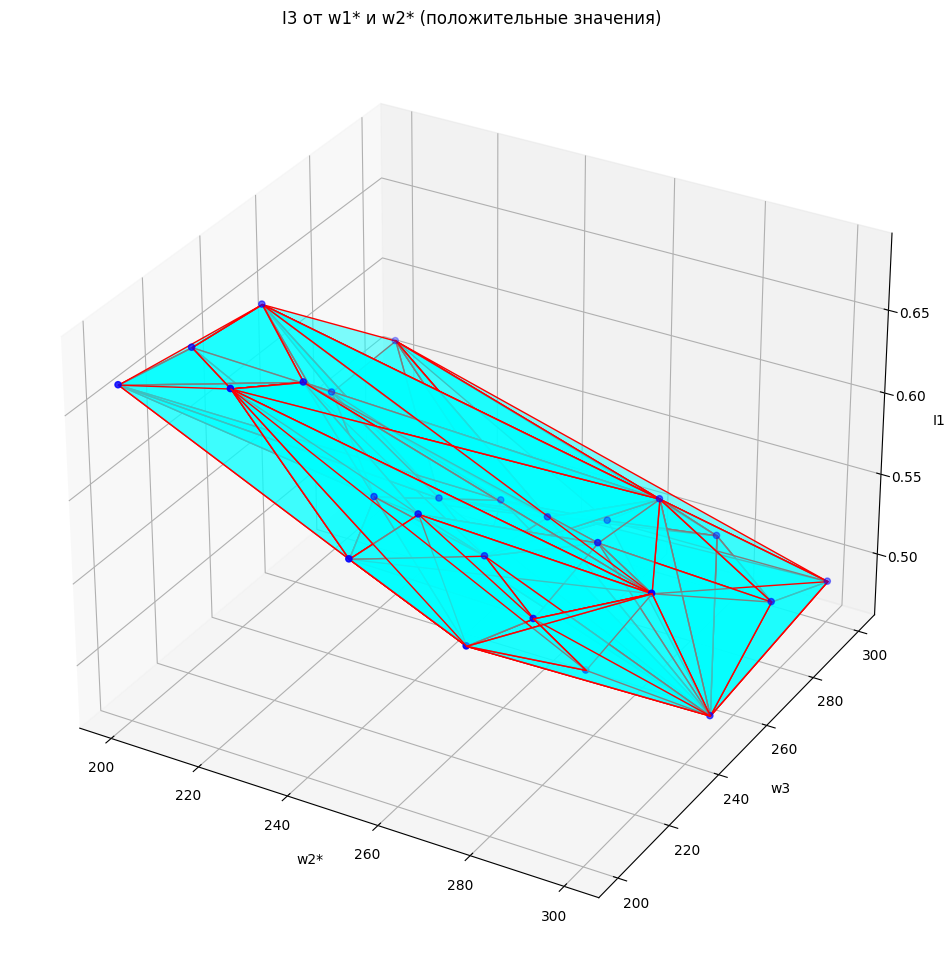

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
points = df_3d_plus.to_numpy()
tri = Delaunay(points)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')
for simplex in tri.simplices:
    vertices = points[simplex]
    ax.add_collection3d(Poly3DCollection([vertices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('w2*')
ax.set_ylabel('w3')
ax.set_zlabel('I1')
ax.set_title('I3 от w1* и w2* (положительные значения)')
plt.show()

In [ ]:
indexs = []
for i in range(10):
  indexs.append(i*5)

indexs = np.array(indexs)
indexs

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

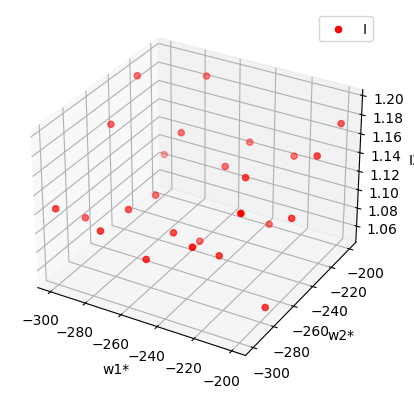

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
z = df_3d_minus['I3']
x = df_3d_minus['w1*']
y = df_3d_minus['w2*']

ax.scatter(x, y, z, label='I', c='r', marker='o')
ax.legend()
# Đặt tên cho các trục
ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('I3')
plt.show()

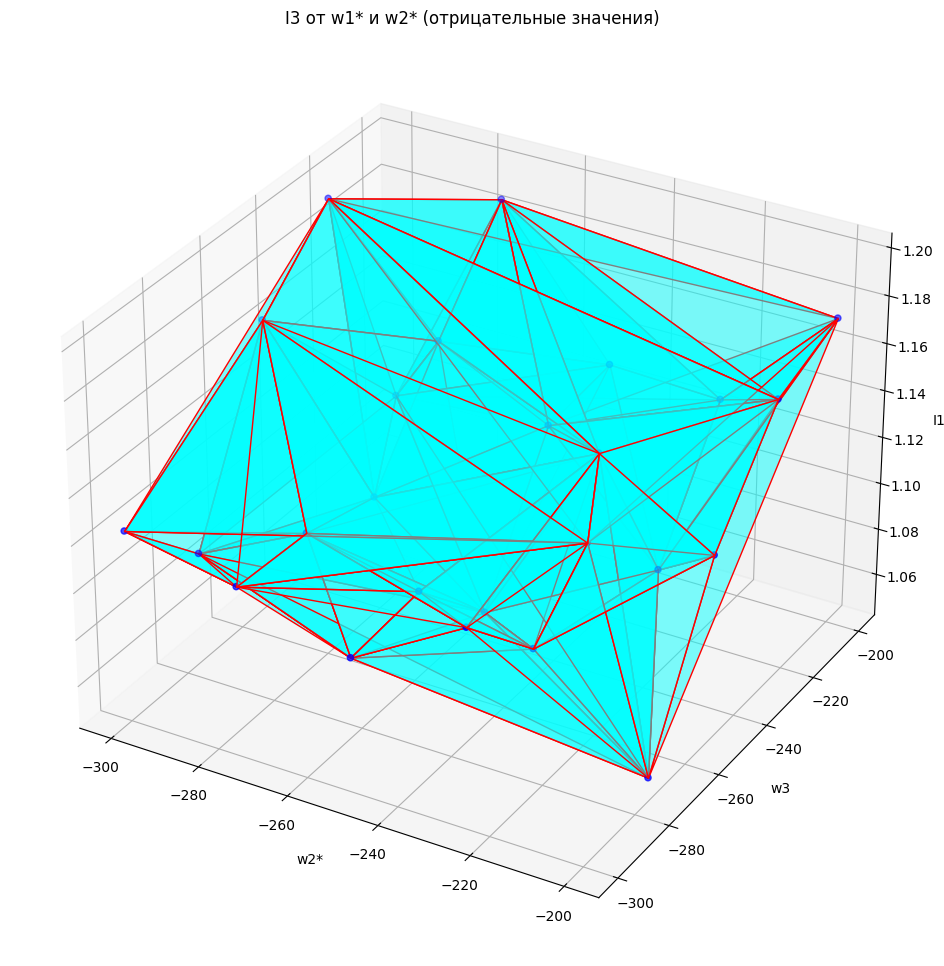

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
points = df_3d_minus.to_numpy()
tri = Delaunay(points)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')
for simplex in tri.simplices:
    vertices = points[simplex]
    ax.add_collection3d(Poly3DCollection([vertices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('w2*')
ax.set_ylabel('w3')
ax.set_zlabel('I1')
ax.set_title('I3 от w1* и w2* (отрицательные значения)')
plt.show()

# 2. Analysis of velocities and currents by comparing them when the robot moves on homogeneous and heterogeneous planes



## 2.1 Compare the real speed of motor and currents of third motor when the robot move on red plane and heterogenous (red, blue, green) planes

In [ ]:
df_velocity_blue = pd.read_csv('data/dataset/dataset/velocity_blue.csv')
df_current_blue = pd.read_csv('data/dataset/dataset/current_blue.csv')
df_blue = pd.concat([df_velocity_blue, df_current_blue], axis = 1)

df_velocity_green = pd.read_csv('data/dataset/dataset/velocity_green.csv')
df_current_green= pd.read_csv('data/dataset/dataset/current_green.csv')
df_green = pd.concat([df_velocity_green, df_current_green], axis = 1)

df_velocity_red = pd.read_csv('data/dataset/dataset/velocity_red.csv')
df_current_red= pd.read_csv('data/dataset/dataset/current_red.csv')
df_red = pd.concat([df_velocity_red, df_current_red], axis = 1)

In [ ]:
index_plus = np.arange(25)
index_minus = np.arange(25, 50)
index_minus

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49])

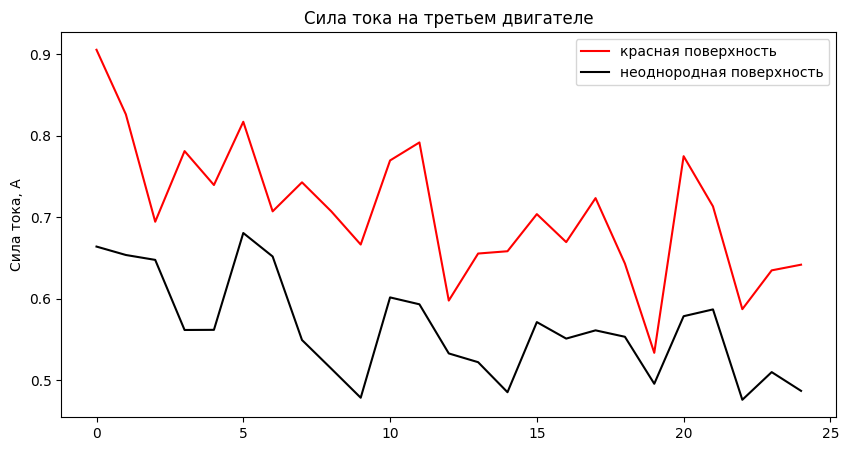

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_red['I3'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df[['I3']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока на третьем двигателе')
plt.legend()

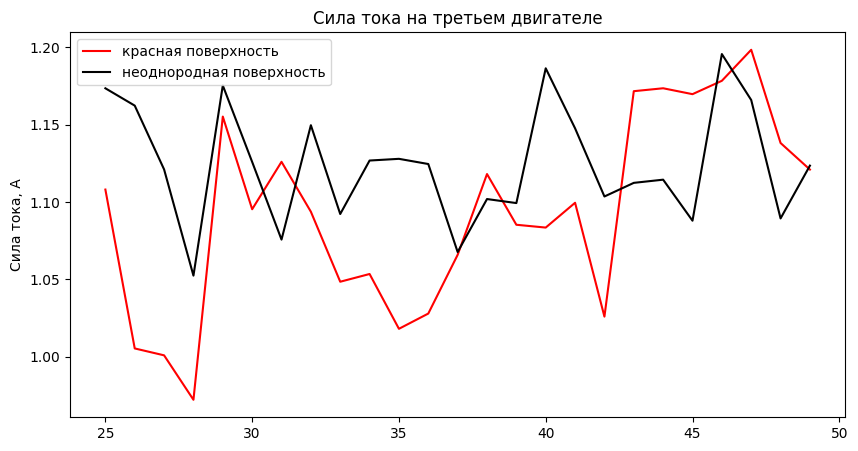

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_red['I3'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df[['I3']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока на третьем двигателе')
plt.legend()

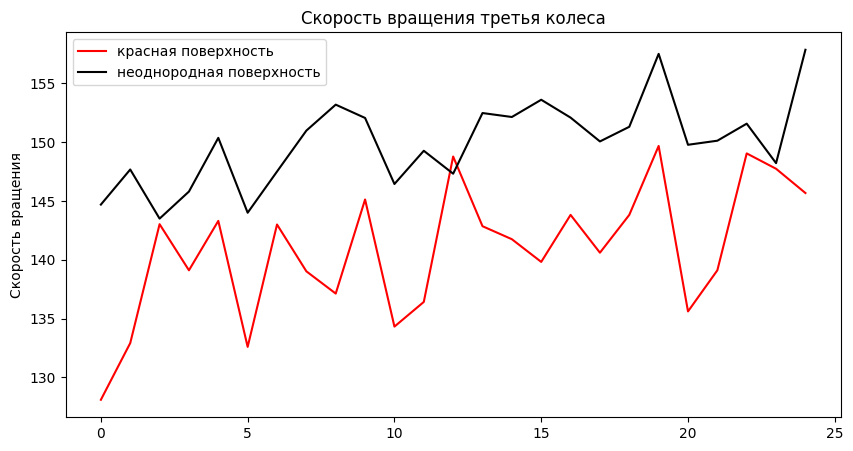

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_red['w3'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df[['w3']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения')
plt.title('Скорость вращения третья колеса')
plt.legend()

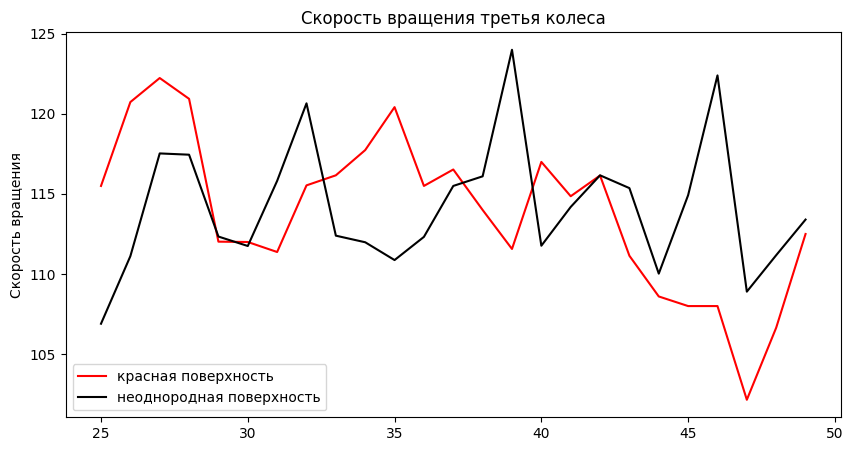

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_red['w3'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df[['w3']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения')
plt.title('Скорость вращения третья колеса')
plt.legend()

***By these graph we can clearly see the mutual infuences when w1 and w2 > 0.***
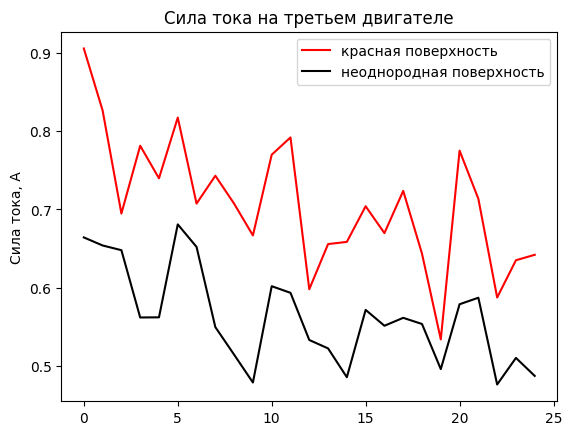
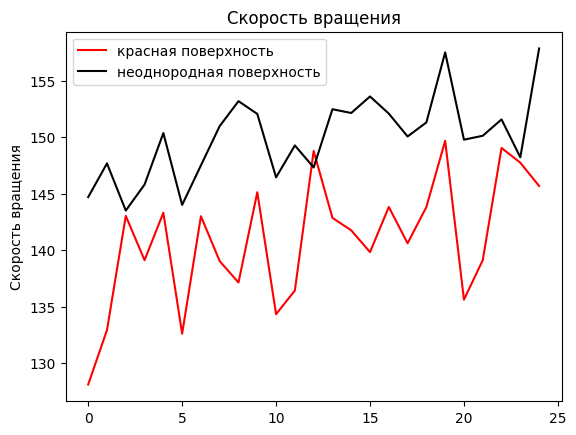

## 2.2 Compare the real speed of motor and currents of third motor when the robot move on green plane and heterogenous (green, redm blue) planes

### 2.2.1 When w1, w2 > 0:

In [ ]:
df_green_red_blue = pd.concat([df_velocity_green_red_blue, df_current_green_red_blue], axis = 1)

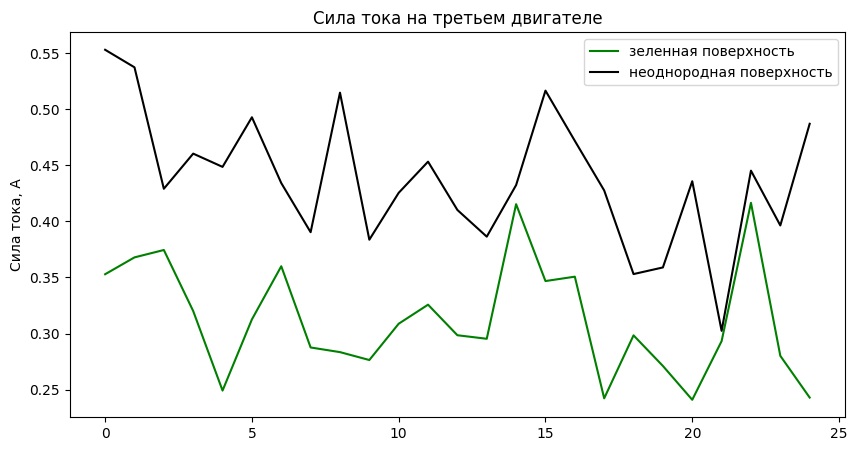

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_green['I3'][:25], color = 'green', label = 'зеленная поверхность')
plt.plot(index_plus, df_green_red_blue[['I3']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока на третьем двигателе')
plt.legend()

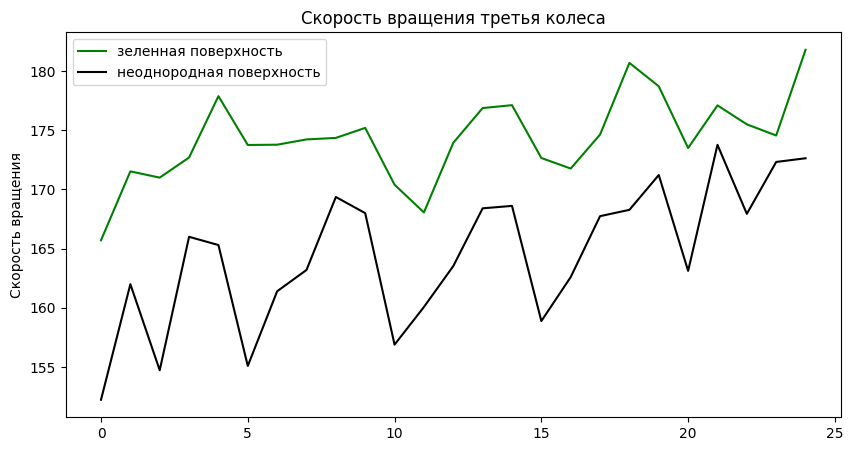

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_green['w3'][:25], color = 'green', label = 'зеленная поверхность')
plt.plot(index_plus, df_green_red_blue[['w3']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения')
plt.title('Скорость вращения третья колеса')
plt.legend()

### 2.2.2 When w1, w2 < 0:

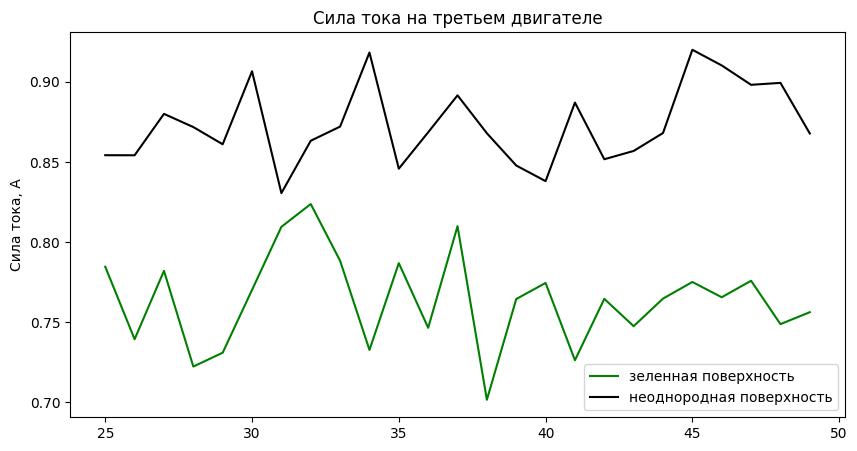

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_green['I3'][25:], color = 'green', label = 'зеленная поверхность')
plt.plot(index_minus, df_green_red_blue[['I3']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока на третьем двигателе')
plt.legend()

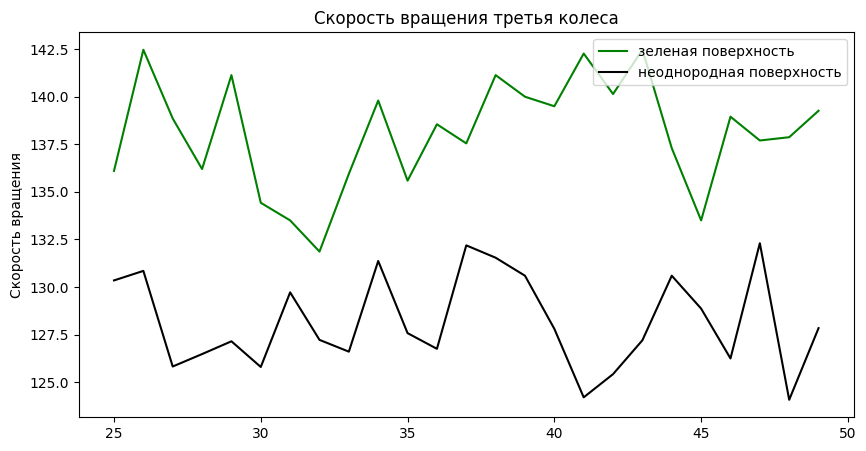

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_green['w3'][25:], color = 'green', label = 'зеленая поверхность')
plt.plot(index_minus, df_green_red_blue[['w3']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения')
plt.title('Скорость вращения третья колеса')
plt.legend()

## 2.3 Compare the real speed of motor and currents of third motor when the robot move on white plane and heterogenous (white, dark red, light green) planes

In [ ]:
df_velocity_white_darkred_lightgreen = pd.read_csv('data/dataset/dataset/velocity_white_darkred_lightgreen.csv')
df_current_white_darkred_lightgreen = pd.read_csv('data/dataset/dataset/current_white_darkred_lightgreen.csv')

df_velocity_white_darkred_lightgreen = df_velocity_white_darkred_lightgreen.drop(columns = 'Unnamed: 0')
df_current_white_darkred_lightgreen = df_current_white_darkred_lightgreen.drop(columns = 'Unnamed: 0')

In [ ]:
df_velocity_white = pd.read_csv('data/dataset/dataset/velocity_white.csv')
df_current_white = pd.read_csv('data/dataset/dataset/current_white.csv')
df_white = pd.concat([df_velocity_white, df_current_white], axis = 1)

df_velocity_dark_red = pd.read_csv('data/dataset/dataset/velocity_dark_red.csv')
df_current_dark_red= pd.read_csv('data/dataset/dataset/current_dark_red.csv')
df_dark_red = pd.concat([df_velocity_dark_red, df_current_dark_red], axis = 1)

df_velocity_light_green = pd.read_csv('data/dataset/dataset/velocity_light_green.csv')
df_current_light_green= pd.read_csv('data/dataset/dataset/current_light_green.csv')
df_light_green = pd.concat([df_velocity_light_green, df_current_light_green], axis = 1)

## 2.3.1 When w1, w2 > 0

In [ ]:
df_white_darkred_lightgreen = pd.concat([df_velocity_white_darkred_lightgreen, df_current_white_darkred_lightgreen], axis = 1)

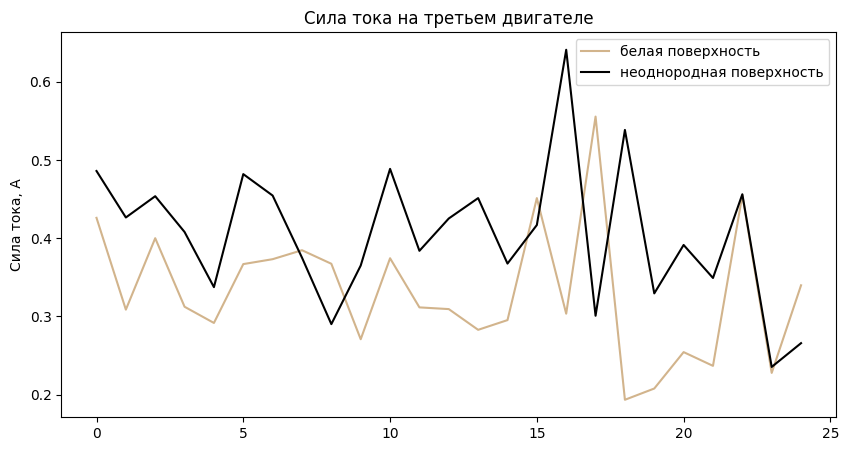

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_white['I3'][:25], color = 'tan', label = 'белая поверхность')
plt.plot(index_plus, df_white_darkred_lightgreen[['I3']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока на третьем двигателе')
plt.legend()

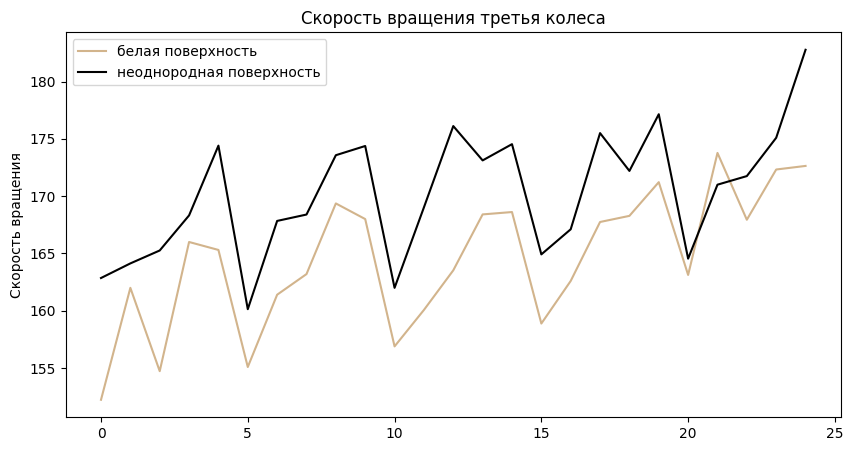

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_white['w3'][:25], color = 'tan', label = 'белая поверхность')
plt.plot(index_plus, df_white_darkred_lightgreen[['w3']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения')
plt.title('Скорость вращения третья колеса')
plt.legend()

## 2.3.2 When w1, w2 < 0

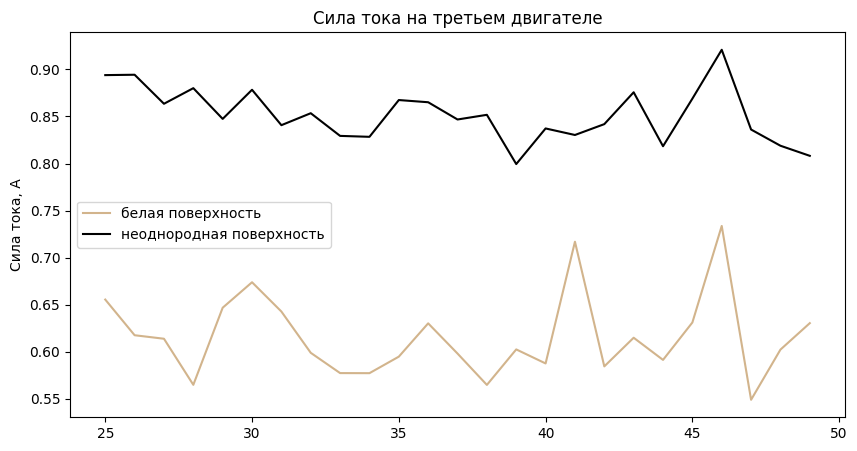

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_white['I3'][25:], color = 'tan', label = 'белая поверхность')
plt.plot(index_minus, df_white_darkred_lightgreen[['I3']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока на третьем двигателе')
plt.legend()

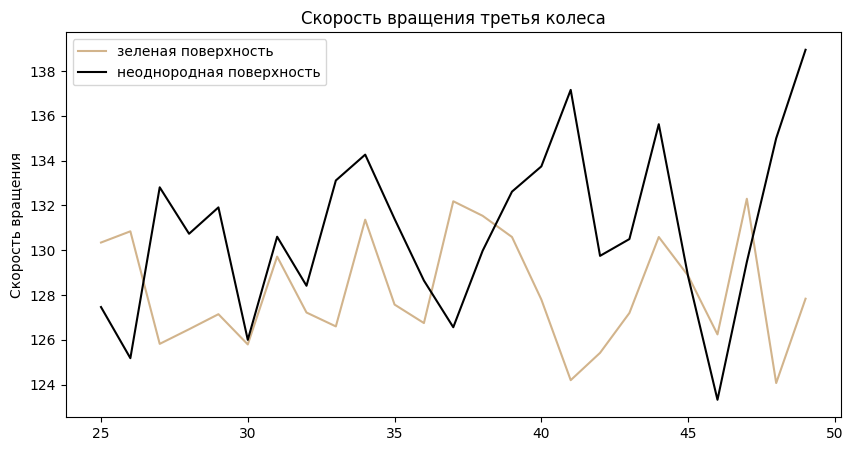

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_white['w3'][25:], color = 'tan', label = 'зеленая поверхность')
plt.plot(index_minus, df_white_darkred_lightgreen[['w3']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения')
plt.title('Скорость вращения третья колеса')
plt.legend()

## 3. Analysis mutual influences using Ix, Iy, If and wx, wy, wf.

wx, wy and wf can be calculated with this formula:

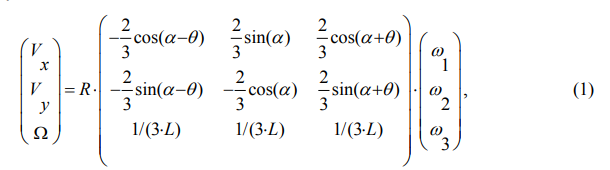

And Ix, Iy and If can be calculated with formula:

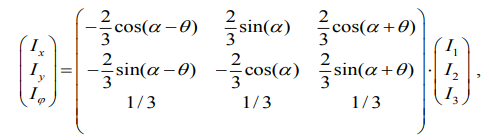

In formula:
* L = 125
* R = 40
* theta = 30 deg
* alpha = 0


In [ ]:
L = 125
R = 40
theta = 2*np.pi*30/360
alpha = 0

In [ ]:
convert_matrix = [[-2/3 * np.cos(alpha - theta), 2/3 * np.sin(alpha), 2/3 *np.cos(alpha + theta)],
                  [-2/3 * np.sin(alpha - theta), -2/3 * np.cos(alpha), 2/3 * np.sin(alpha + theta)],
                  [1/3, 1/3, 1/3]]

## 3.1 Plot graph showing the dependence of vx, vy, vf and Ix, Iy, If when robot moves in heterogenous plane on vx, vy, vf and Ix, Iy, If when robot moves in homogeneous plane.

### 3.1 Plot gprahs for vx, vy, vf

In [ ]:
df_velocity_red_blue_green = pd.read_csv('data/dataset/dataset/velocity_red_blue_green.csv')
df_velocity_red = pd.read_csv('data/dataset/dataset/velocity_red.csv')
df_velocity_green = pd.read_csv('data/dataset/dataset/velocity_green.csv')
df_velocity_blue = pd.read_csv('data/dataset/dataset/velocity_blue.csv')

df_velocity_red_blue_green = df_velocity_red_blue_green.drop(columns = 'Unnamed: 0')
df_velocity_red = df_velocity_red.drop(columns = 'Unnamed: 0')
df_velocity_green = df_velocity_green.drop(columns = 'Unnamed: 0')
df_velocity_blue = df_velocity_blue.drop(columns = 'Unnamed: 0')

df_velocity_red_blue_green = df_velocity_red_blue_green[['w1', 'w2', 'w3']]
df_velocity_red = df_velocity_red[['w1', 'w2', 'w3']]
df_velocity_green = df_velocity_green[['w1', 'w2', 'w3']]
df_velocity_blue = df_velocity_blue[['w1', 'w2', 'w3']]

In [ ]:
df_velocity_red = df_velocity_red.rename(columns = {'w3' : 'w3_red', 'w1' : 'w1_red', 'w2' : 'w2_red'})
df_velocity_green = df_velocity_green.rename(columns = {'w3' : 'w3_green', 'w1' : 'w1_green', 'w2' : 'w2_green'})
df_velocity_blue = df_velocity_blue.rename(columns = {'w3' : 'w3_blue', 'w1' : 'w1_blue', 'w2' : 'w2_blue'})

In [ ]:
def convertor(df_original):
  convert_matrix = [[-2/3 * np.cos(alpha - theta), 2/3 * np.sin(alpha), 2/3 *np.cos(alpha + theta)],
                  [-2/3 * np.sin(alpha - theta), -2/3 * np.cos(alpha), 2/3 * np.sin(alpha + theta)],
                  [1/3, 1/3, 1/3]]

  convertion = np.dot(convert_matrix, df_original.T.to_numpy())
  df_converted = pd.DataFrame(convertion.T)

  return df_converted

In [ ]:
df_velocity_green_converted = convertor(df_velocity_green)
df_velocity_green_converted.columns = ['v_green_x', 'v_green_y', 'v_green_f']
df_velocity_green_converted.head()

v_green_x  v_green_y   v_green_f
0   1.100362  -2.901548  166.203715
1   0.611312 -15.600000  178.800000
2  -0.773895 -23.668576  183.504501
3  -2.731131 -40.971105  195.548895
4   2.414683 -54.498190  203.040271

In [ ]:
df_velocity_red_converted = convertor(df_velocity_red)
df_velocity_red_converted.columns = ['v_red_x', 'v_red_y', 'v_red_f']
df_velocity_red_converted.head()

v_red_x    v_red_y     v_red_f
0 -4.722339   3.492401  130.449848
1 -1.588824  -8.548940  138.573509
2  3.639398 -17.269856  148.510144
3  0.501542 -36.623606  156.986151
4  0.822920 -48.201958  166.696001

In [ ]:
df_velocity_blue_converted = convertor(df_velocity_blue)
df_velocity_blue_converted.columns = ['v_blue_x', 'v_blue_y', 'v_blue_f']
df_velocity_blue_converted.head()

v_blue_x   v_blue_y    v_blue_f
0 -4.395242   4.598120  157.823120
1 -1.263929 -10.259141  166.034976
2  0.630056 -26.207666  177.192334
3 -1.454358 -35.607531  188.106755
4  1.454193 -52.696721  198.017564

In [ ]:
df_velocity_red_blue_green_converted = convertor(df_velocity_red_blue_green)
df_velocity_red_blue_green_converted.columns = ['v_x', 'v_y', 'v_f']
df_velocity_red_blue_green_converted.head()

v_x        v_y         v_f
0  -7.683200   6.252275  148.220017
1  -5.933158  -3.245510  154.434490
2 -10.680980 -19.143411  162.321705
3 -12.817176 -32.356522  173.078261
4  -7.996905 -42.663345  178.619264

#### Graph for vx:

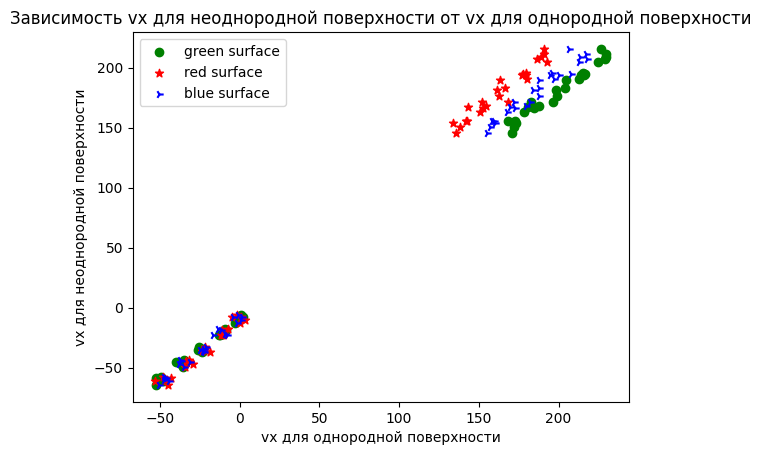

In [ ]:
fig, ax = plt.subplots()
x1 = df_velocity_green_converted['v_green_x']
x2 = df_velocity_red_converted['v_red_x']
x3 = df_velocity_blue_converted['v_blue_x']
y = df_velocity_red_blue_green_converted['v_x']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'green surface')
ax.set_ylabel('vx для неоднородной поверхности')
ax.set_xlabel('vx для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'blue surface')
# plt.grid(axis='x', color='0.5')
# plt.grid(axis='y', color='0.95')
ax.set_title('Зависимость vx для неоднородной поверхности от vx для однородной поверхности')
ax.legend()
plt.show()

#### Graph for vy

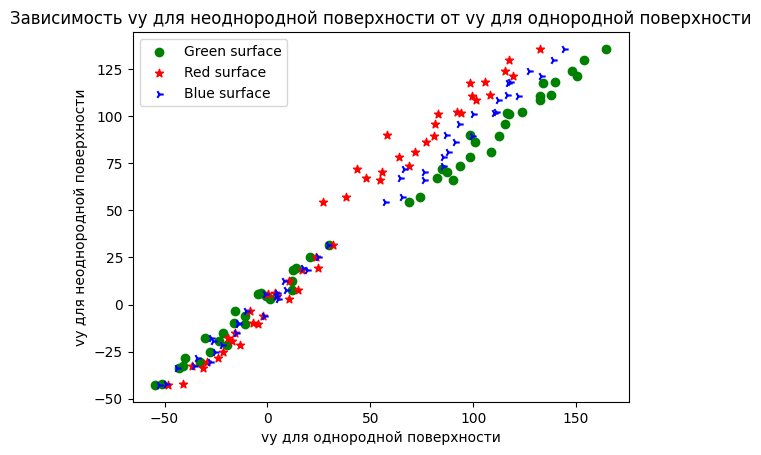

In [ ]:
fig, ax = plt.subplots()
x1 = df_velocity_green_converted['v_green_y']
x2 = df_velocity_red_converted['v_red_y']
x3 = df_velocity_blue_converted['v_blue_y']
y = df_velocity_red_blue_green_converted['v_y']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('vy для неоднородной поверхности')
ax.set_xlabel('vy для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость vy для неоднородной поверхности от vy для однородной поверхности')
ax.legend()
plt.show()

#### Graph for vf

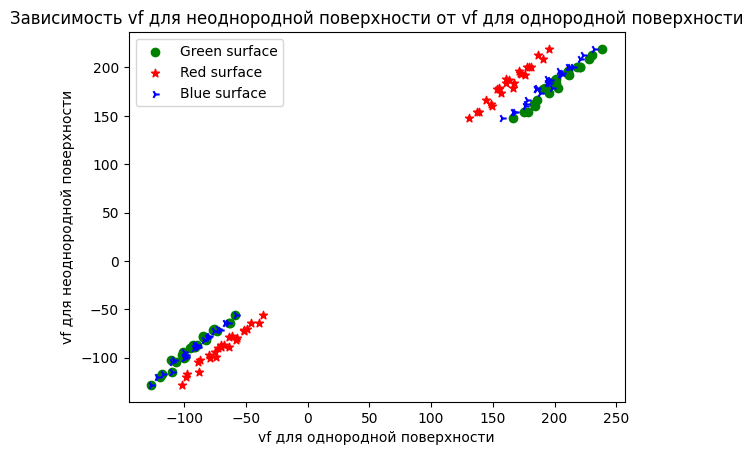

In [ ]:
fig, ax = plt.subplots()
x1 = df_velocity_green_converted['v_green_f']
x2 = df_velocity_red_converted['v_red_f']
x3 = df_velocity_blue_converted['v_blue_f']
y = df_velocity_red_blue_green_converted['v_f']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('vf для неоднородной поверхности')
ax.set_xlabel('vf для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость vf для неоднородной поверхности от vf для однородной поверхности')
ax.legend()
plt.show()

### 3.1 Plot gprahs for Ix, Iy, If

In [ ]:
df_current_red_blue_green = pd.read_csv('data/dataset/dataset/current_red_blue_green.csv')
df_current_red = pd.read_csv('data/dataset/dataset/current_red.csv')
df_current_green = pd.read_csv('data/dataset/dataset/current_green.csv')
df_current_blue = pd.read_csv('data/dataset/dataset/current_blue.csv')

df_current_red_blue_green = df_current_red_blue_green.drop(columns = 'Unnamed: 0')
df_current_red = df_current_red.drop(columns = 'Unnamed: 0')
df_current_green = df_current_green.drop(columns = 'Unnamed: 0')
df_current_blue = df_current_blue.drop(columns = 'Unnamed: 0')

df_current_red_blue_green = df_current_red_blue_green[['I1', 'I2', 'I3']]
df_current_red = df_current_red[['I1', 'I2', 'I3']]
df_current_green = df_current_green[['I1', 'I2', 'I3']]
df_current_blue = df_current_blue[['I1', 'I2', 'I3']]

In [ ]:
df_current_red = df_current_red.rename(columns = {'I3' : 'I3_red', 'I1' : 'I1_red', 'I2' : 'I2_red'})
df_current_green = df_current_green.rename(columns = {'I3' : 'I3_green', 'I1' : 'I1_green', 'I2' : 'I2_green'})
df_current_blue = df_current_blue.rename(columns = {'I3' : 'I3_blue', 'I1' : 'I1_blue', 'I2' : 'I2_blue'})

In [ ]:
def convertor(df_original):
  convert_matrix = [[-2/3 * np.cos(alpha - theta), 2/3 * np.sin(alpha), 2/3 *np.cos(alpha + theta)],
                  [-2/3 * np.sin(alpha - theta), -2/3 * np.cos(alpha), 2/3 * np.sin(alpha + theta)],
                  [1/3, 1/3, 1/3]]

  convertion = np.dot(convert_matrix, df_original.T.to_numpy())
  df_converted = pd.DataFrame(convertion.T)

  return df_converted

In [ ]:
df_current_green_converted = convertor(df_current_green)
df_current_green_converted.columns = ['I_green_x', 'I_green_y', 'I_green_f']
df_current_green_converted.head()

I_green_x  I_green_y  I_green_f
0  -0.017016  -0.009566   0.372432
1  -0.122502  -0.005830   0.476953
2   0.029806  -0.127068   0.412263
3   0.007147  -0.158650   0.393206
4  -0.057751  -0.184092   0.391144

In [ ]:
df_current_red_converted = convertor(df_current_red)
df_current_red_converted.columns = ['I_red_x', 'I_red_y', 'I_red_f']
df_current_red_converted.head()

I_red_x   I_red_y   I_red_f
0  0.057443 -0.050861  0.881249
1  0.023622 -0.165007  0.888386
2 -0.014677 -0.277191  0.845945
3 -0.018273 -0.272966  0.933587
4  0.036076 -0.354305  0.885582

In [ ]:
df_current_blue_converted = convertor(df_current_blue)
df_current_blue_converted.columns = ['I_blue_x', 'I_blue_y', 'I_blue_f']
df_current_blue_converted.head()

I_blue_x  I_blue_y  I_blue_f
0 -0.012215 -0.019919  0.445446
1 -0.066281 -0.075818  0.479483
2  0.003551 -0.148811  0.501982
3  0.026065 -0.221559  0.435784
4 -0.050066 -0.248998  0.510200

In [ ]:
df_current_red_blue_green_converted = convertor(df_current_red_blue_green)
df_current_red_blue_green_converted.columns = ['I_x', 'I_y', 'I_f']
df_current_red_blue_green_converted.head()

I_x       I_y       I_f
0  0.101654 -0.089218  0.620739
1  0.132106 -0.211899  0.645389
2  0.145998 -0.299724  0.671261
3  0.093268 -0.343199  0.652686
4  0.097872 -0.418555  0.686542

#### Graph for Ix

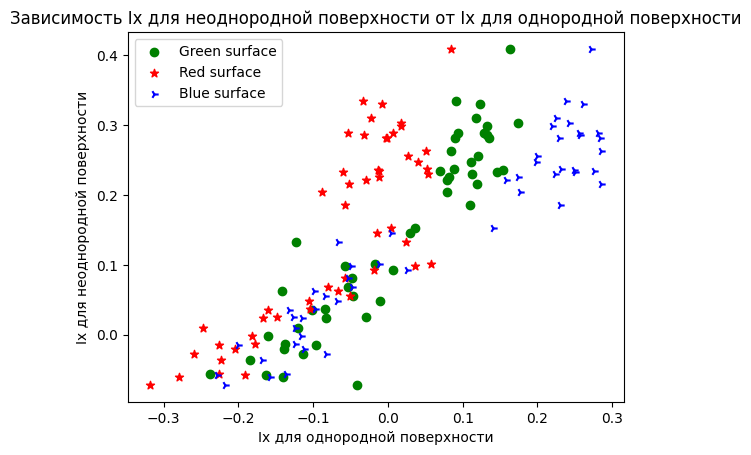

In [ ]:
fig, ax = plt.subplots()
x1 = df_current_green_converted['I_green_x']
x2 = df_current_red_converted['I_red_x']
x3 = df_current_blue_converted['I_blue_x']
y = df_current_red_blue_green_converted['I_x']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('Ix для неоднородной поверхности')
ax.set_xlabel('Ix для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость Ix для неоднородной поверхности от Ix для однородной поверхности')

ax.legend()
plt.show()

#### Graph for Iy

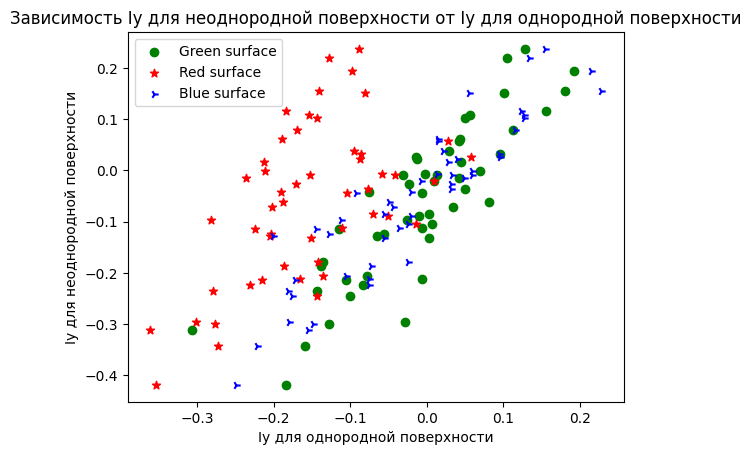

In [ ]:
fig, ax = plt.subplots()
x1 = df_current_green_converted['I_green_y']
x2 = df_current_red_converted['I_red_y']
x3 = df_current_blue_converted['I_blue_y']
y = df_current_red_blue_green_converted['I_y']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('Iy для неоднородной поверхности')
ax.set_xlabel('Iy для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.legend()
ax.set_title('Зависимость Iy для неоднородной поверхности от Iy для однородной поверхности')
plt.show()

#### Graph for If

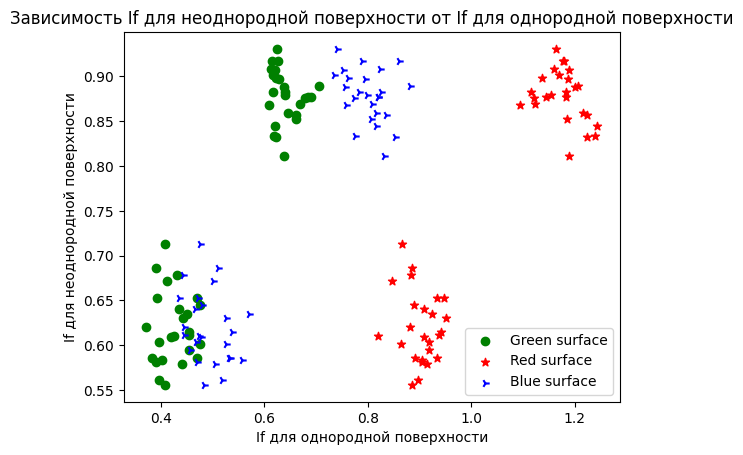

In [ ]:
fig, ax = plt.subplots()
x1 = df_current_green_converted['I_green_f']
x2 = df_current_red_converted['I_red_f']
x3 = df_current_blue_converted['I_blue_f']
y = df_current_red_blue_green_converted['I_f']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('If для неоднородной поверхности')
ax.set_xlabel('If для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость If для неоднородной поверхности от If для однородной поверхности')
ax.legend()
plt.show()

# 4. Compare the vx, vy, vf and Ix, Iy, If when robot moves in heterogenous plane on vx, vy, vf and Ix, Iy, If when robot moves in homogeneous plane.

## 4.1 When robot moves in heterogenous plane: red, blue, green

### 4.1.1 For Ix, Iy, If

In [ ]:
index_plus = np.arange(25)
index_minus = np.arange(25, 50)
index_minus

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49])

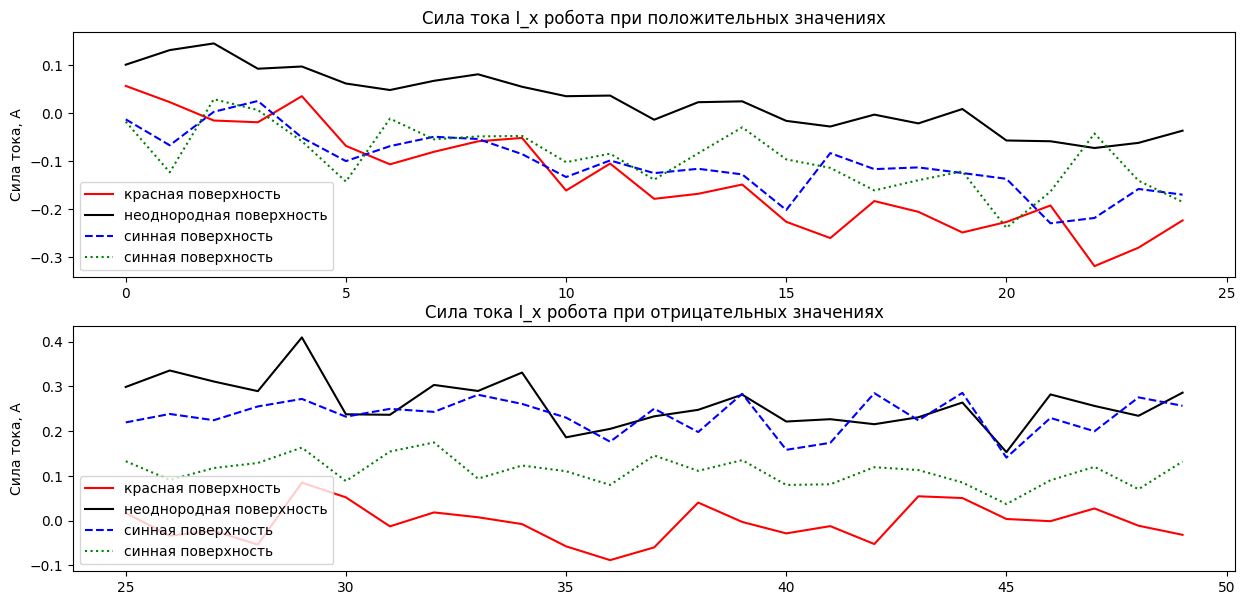

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_red_converted['I_red_x'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_current_red_blue_green_converted[['I_x']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_blue_converted[['I_blue_x']][:25], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_current_green_converted[['I_green_x']][:25],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_x робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_red_converted['I_red_x'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_current_red_blue_green_converted[['I_x']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_blue_converted[['I_blue_x']][25:], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_current_green_converted[['I_green_x']][25:],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_x робота при отрицательных значениях')
plt.legend()

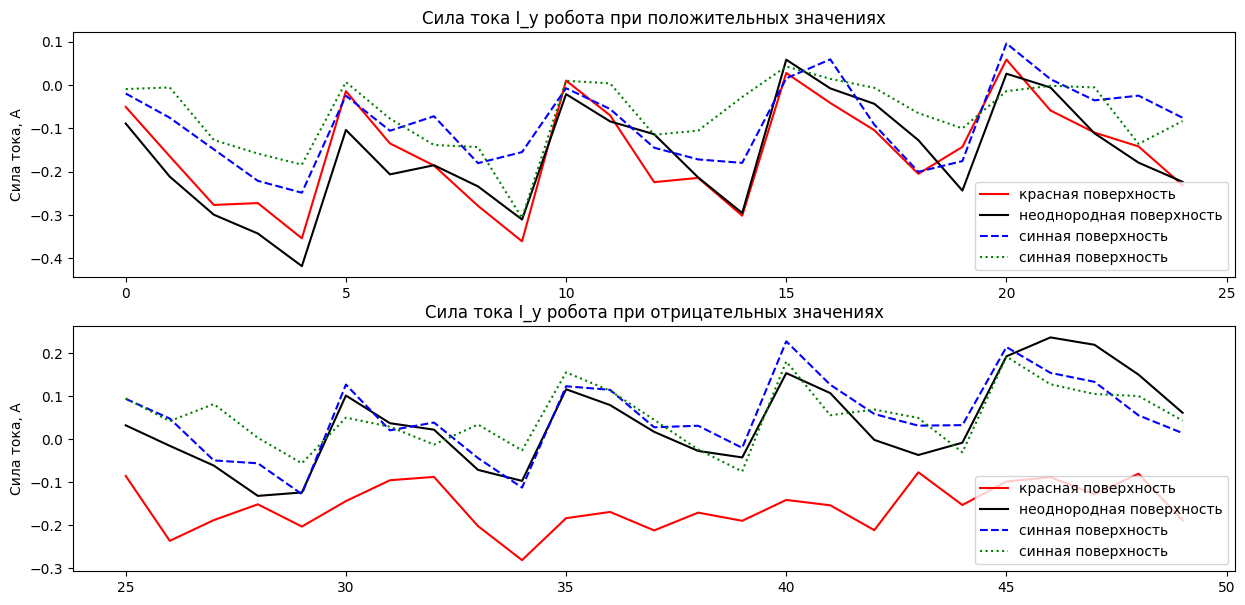

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_red_converted['I_red_y'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_current_red_blue_green_converted[['I_y']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_blue_converted[['I_blue_y']][:25], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_current_green_converted[['I_green_y']][:25],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_y робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_red_converted['I_red_y'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_current_red_blue_green_converted[['I_y']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_blue_converted[['I_blue_y']][25:], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_current_green_converted[['I_green_y']][25:],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_y робота при отрицательных значениях')
plt.legend()

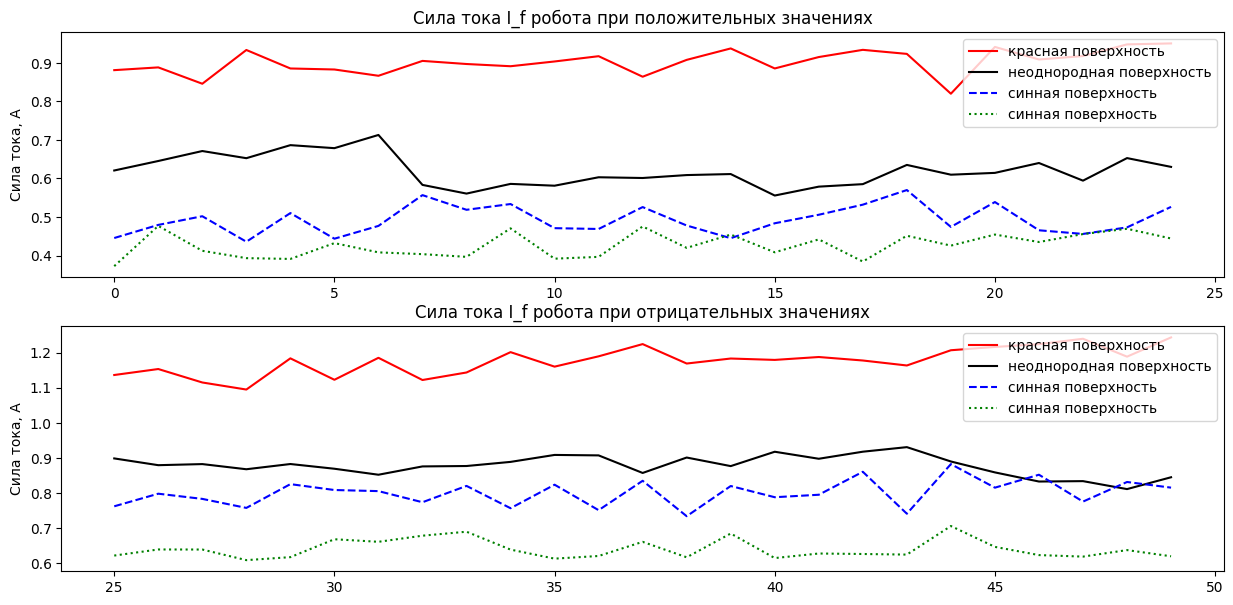

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_red_converted['I_red_f'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_current_red_blue_green_converted[['I_f']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_blue_converted[['I_blue_f']][:25], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_current_green_converted[['I_green_f']][:25],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_f робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_red_converted['I_red_f'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_current_red_blue_green_converted[['I_f']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_blue_converted[['I_blue_f']][25:], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_current_green_converted[['I_green_f']][25:],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_f робота при отрицательных значениях')
plt.legend()

### 4.1.2 For wx, wy, wf

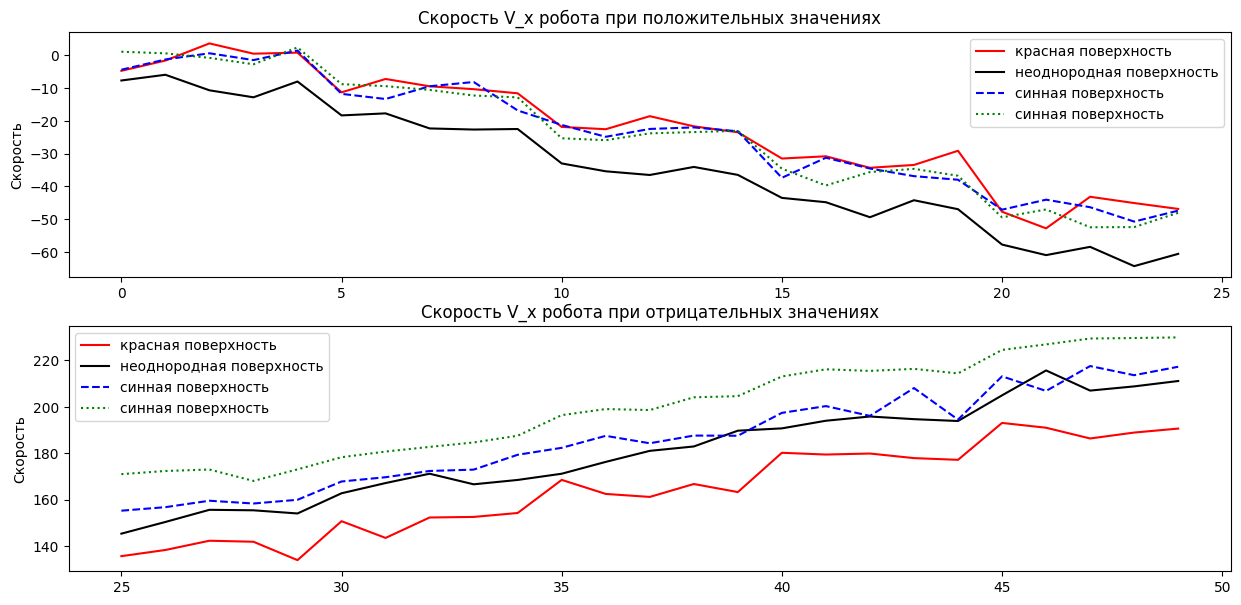

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_red_converted['v_red_x'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_velocity_red_blue_green_converted[['v_x']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_blue_converted[['v_blue_x']][:25], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_velocity_green_converted[['v_green_x']][:25],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_x робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_red_converted['v_red_x'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_velocity_red_blue_green_converted[['v_x']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_blue_converted[['v_blue_x']][25:], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_velocity_green_converted[['v_green_x']][25:],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_x робота при отрицательных значениях')
plt.legend()

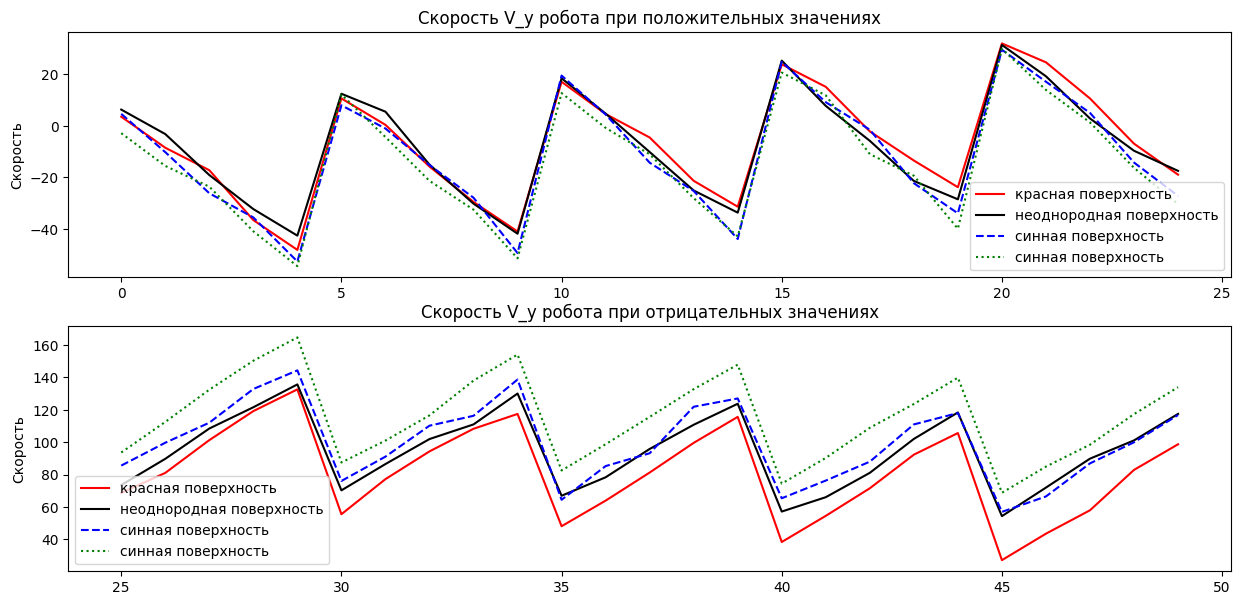

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_red_converted['v_red_y'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_velocity_red_blue_green_converted[['v_y']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_blue_converted[['v_blue_y']][:25], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_velocity_green_converted[['v_green_y']][:25],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_y робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_red_converted['v_red_y'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_velocity_red_blue_green_converted[['v_y']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_blue_converted[['v_blue_y']][25:], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_velocity_green_converted[['v_green_y']][25:],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_y робота при отрицательных значениях')
plt.legend()

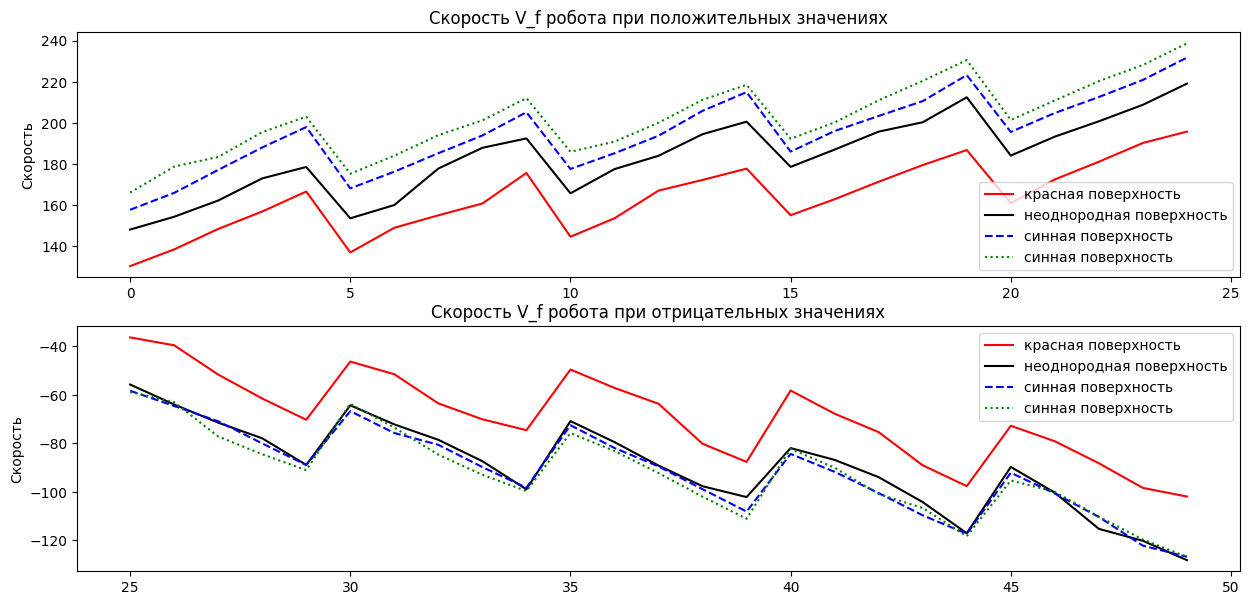

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_red_converted['v_red_f'][:25], color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_velocity_red_blue_green_converted[['v_f']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_blue_converted[['v_blue_f']][:25], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_velocity_green_converted[['v_green_f']][:25],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_f робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_red_converted['v_red_f'][25:], color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_velocity_red_blue_green_converted[['v_f']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_blue_converted[['v_blue_f']][25:], '--', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_velocity_green_converted[['v_green_f']][25:],':', color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_f робота при отрицательных значениях')
plt.legend()

## 4.2 When robot moves in heterogenous plane: green, red, blue

In [ ]:
df_velocity_green_red_blue = pd.read_csv('data/dataset/dataset/velocity_green_red_blue.csv')
df_velocity_green_red_blue = df_velocity_green_red_blue.drop(columns = 'Unnamed: 0')
df_velocity_green_red_blue = df_velocity_green_red_blue[['w1', 'w2', 'w3']]

df_current_green_red_blue = pd.read_csv('data/dataset/dataset/current_green_red_blue.csv')
df_current_green_red_blue = df_current_green_red_blue.drop(columns = 'Unnamed: 0')
df_current_green_red_blue = df_current_green_red_blue[['I1', 'I2', 'I3']]

In [ ]:
df_velocity_green_red_blue_converted = convertor(df_velocity_green_red_blue)
df_velocity_green_red_blue_converted.columns = ['v_x', 'v_y', 'v_f']
df_velocity_green_red_blue_converted.head()

v_x        v_y         v_f
0 -1.571824   3.743009  151.723778
1  2.711036  -5.751264  162.527806
2 -3.685795 -24.843159  170.344341
3 -0.562157 -38.869237  185.921461
4 -0.802245 -57.878196  194.939985

In [ ]:
df_current_green_red_blue_converted = convertor(df_current_green_red_blue)
df_current_green_red_blue_converted.columns = ['I_x', 'I_y', 'I_f']
df_current_green_red_blue_converted.head()

I_x       I_y       I_f
0  0.020455 -0.027609  0.549315
1  0.021359 -0.112527  0.575343
2  0.005218 -0.162398  0.505871
3  0.045996 -0.190612  0.516025
4  0.034593 -0.195071  0.516295

### For Ix, Iy, If

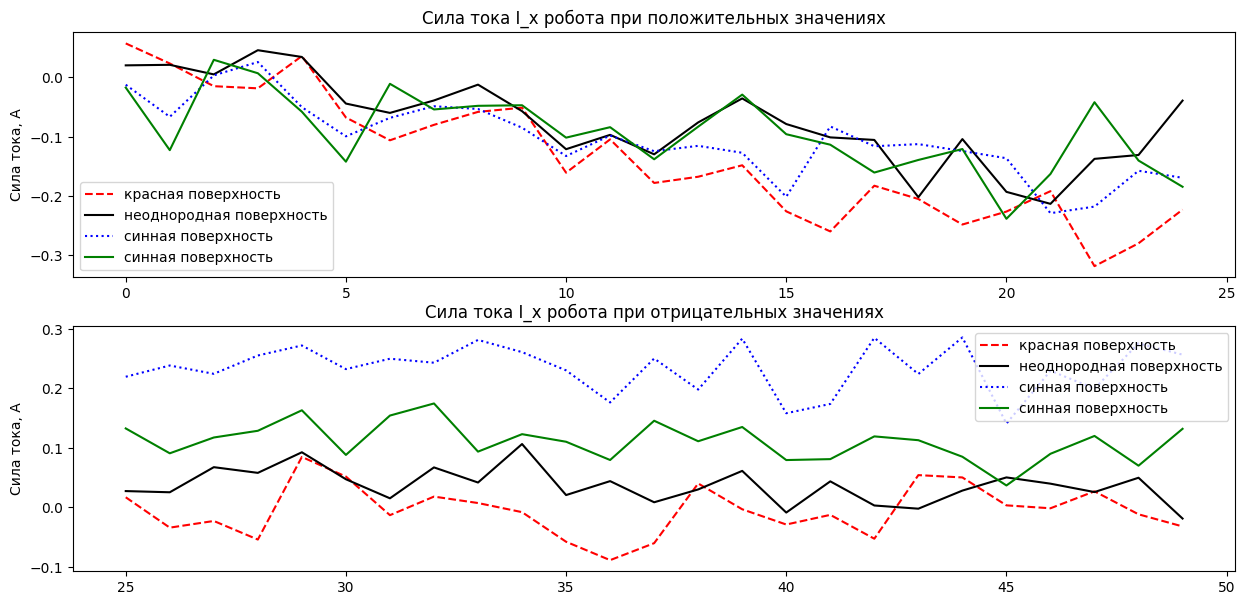

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_red_converted['I_red_x'][:25],'--', color = 'red',  label = 'красная поверхность')
plt.plot(index_plus, df_current_green_red_blue_converted[['I_x']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_blue_converted[['I_blue_x']][:25], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_current_green_converted[['I_green_x']][:25],color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_x робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_red_converted['I_red_x'][25:],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_current_green_red_blue_converted[['I_x']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_blue_converted[['I_blue_x']][25:], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_current_green_converted[['I_green_x']][25:], color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_x робота при отрицательных значениях')
plt.legend()

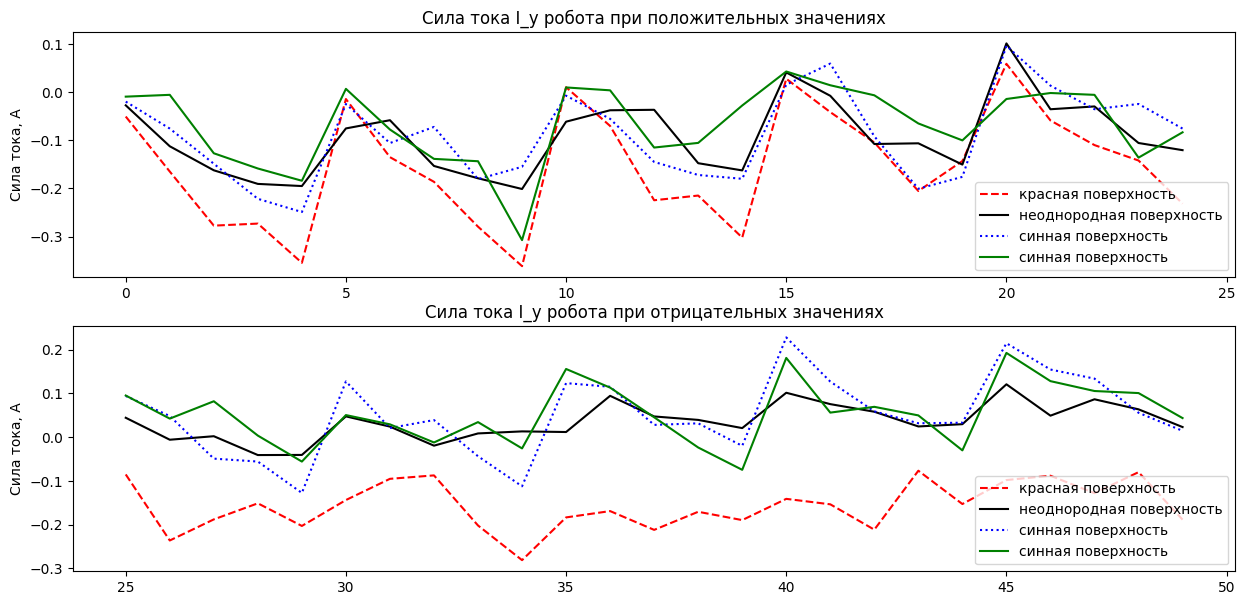

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_red_converted['I_red_y'][:25],'--', color = 'red',  label = 'красная поверхность')
plt.plot(index_plus, df_current_green_red_blue_converted[['I_y']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_blue_converted[['I_blue_y']][:25], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_current_green_converted[['I_green_y']][:25],color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_y робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_red_converted['I_red_y'][25:],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_current_green_red_blue_converted[['I_y']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_blue_converted[['I_blue_y']][25:], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_current_green_converted[['I_green_y']][25:], color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_y робота при отрицательных значениях')
plt.legend()

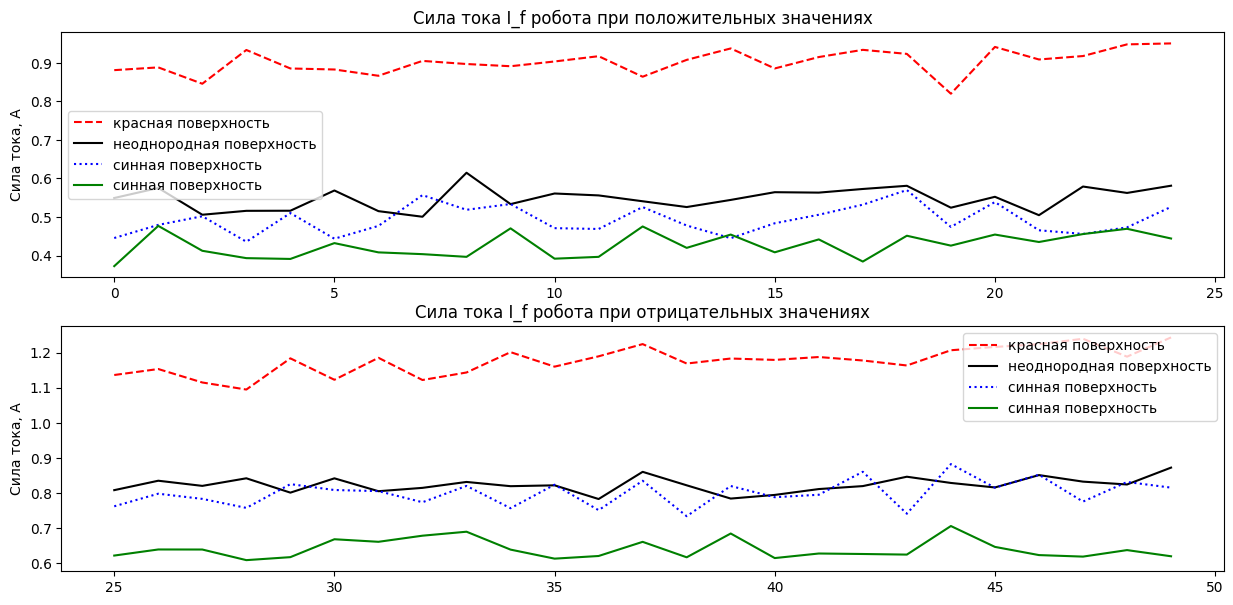

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_red_converted['I_red_f'][:25],'--', color = 'red',  label = 'красная поверхность')
plt.plot(index_plus, df_current_green_red_blue_converted[['I_f']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_blue_converted[['I_blue_f']][:25], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_current_green_converted[['I_green_f']][:25],color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_f робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_red_converted['I_red_f'][25:],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_current_green_red_blue_converted[['I_f']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_blue_converted[['I_blue_f']][25:], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_current_green_converted[['I_green_f']][25:], color = 'green', label = 'синная поверхность')
plt.ylabel('Сила тока, А')
plt.title('Сила тока I_f робота при отрицательных значениях')
plt.legend()

### For Vx, Vy, Vf

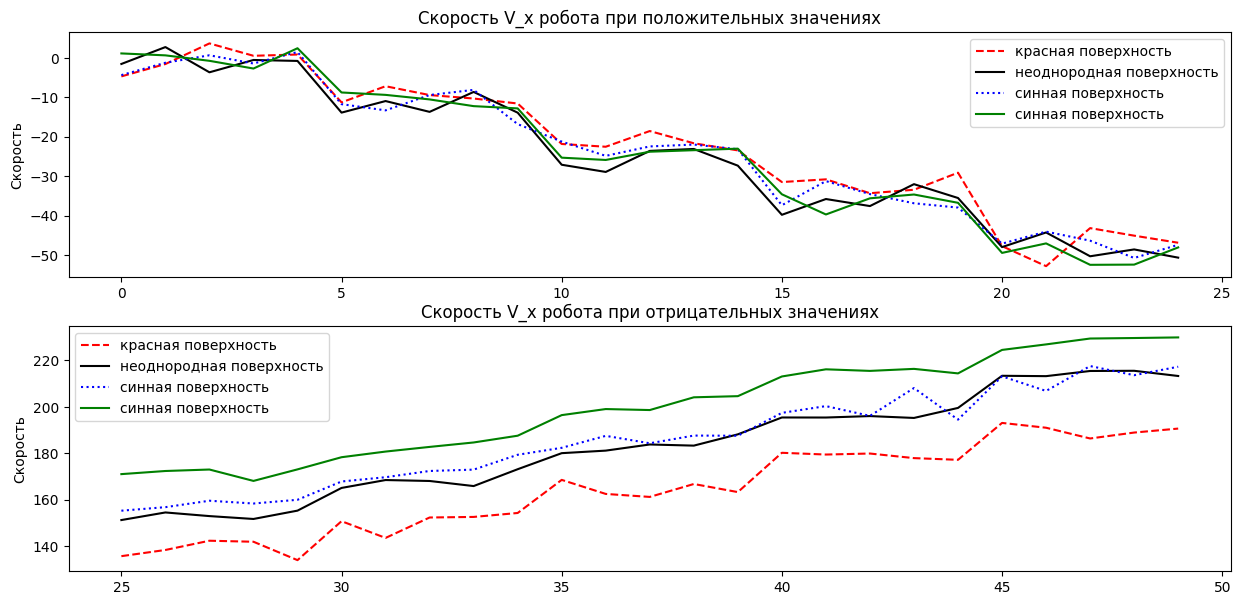

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_red_converted['v_red_x'][:25],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_velocity_green_red_blue_converted[['v_x']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_blue_converted[['v_blue_x']][:25], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_velocity_green_converted[['v_green_x']][:25], color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_x робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_red_converted['v_red_x'][25:],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_velocity_green_red_blue_converted[['v_x']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_blue_converted[['v_blue_x']][25:], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_velocity_green_converted[['v_green_x']][25:], color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_x робота при отрицательных значениях')
plt.legend()

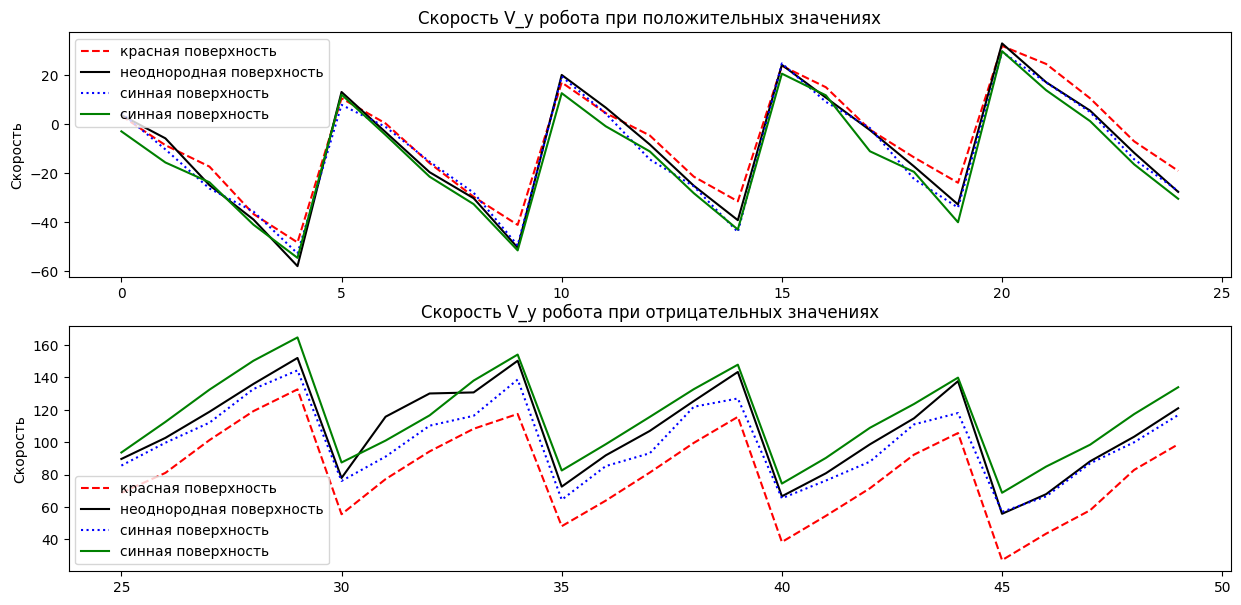

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_red_converted['v_red_y'][:25],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_velocity_green_red_blue_converted[['v_y']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_blue_converted[['v_blue_y']][:25], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_velocity_green_converted[['v_green_y']][:25], color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_y робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_red_converted['v_red_y'][25:],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_velocity_green_red_blue_converted[['v_y']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_blue_converted[['v_blue_y']][25:], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_velocity_green_converted[['v_green_y']][25:], color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_y робота при отрицательных значениях')
plt.legend()

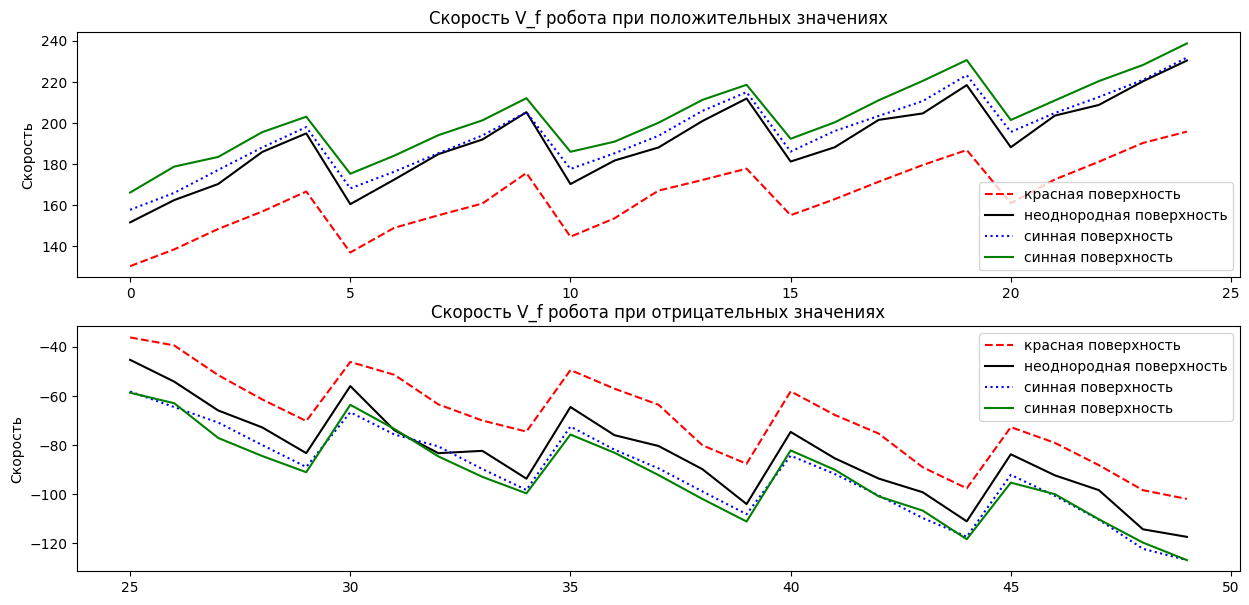

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_red_converted['v_red_f'][:25],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_plus, df_velocity_green_red_blue_converted[['v_f']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_blue_converted[['v_blue_f']][:25], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_plus, df_velocity_green_converted[['v_green_f']][:25], color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_f робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_red_converted['v_red_f'][25:],'--', color = 'red', label = 'красная поверхность')
plt.plot(index_minus, df_velocity_green_red_blue_converted[['v_f']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_blue_converted[['v_blue_f']][25:], ':', color = 'blue', label = 'синная поверхность')
plt.plot(index_minus, df_velocity_green_converted[['v_green_f']][25:], color = 'green', label = 'синная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_f робота при отрицательных значениях')
plt.legend()

## 4.2 When robot moves in heterogenous plane: white, dark red, light green

In [ ]:
df_velocity_white_darkred_lightgreen = pd.read_csv('data/dataset/dataset/velocity_white_darkred_lightgreen.csv')
df_velocity_white = pd.read_csv('data/dataset/dataset/velocity_white.csv')
df_velocity_dark_red = pd.read_csv('data/dataset/dataset/velocity_dark_red.csv')
df_velocity_light_green = pd.read_csv('data/dataset/dataset/velocity_light_green.csv')

df_velocity_white_darkred_lightgreen = df_velocity_white_darkred_lightgreen.drop(columns = 'Unnamed: 0')
df_velocity_white = df_velocity_white.drop(columns = 'Unnamed: 0')
df_velocity_dark_red = df_velocity_dark_red.drop(columns = 'Unnamed: 0')
df_velocity_light_green = df_velocity_light_green.drop(columns = 'Unnamed: 0')

df_velocity_white_darkred_lightgreen = df_velocity_white_darkred_lightgreen[['w1', 'w2', 'w3']]
df_velocity_white = df_velocity_white[['w1', 'w2', 'w3']]
df_velocity_dark_red = df_velocity_dark_red[['w1', 'w2', 'w3']]
df_velocity_light_green = df_velocity_light_green[['w1', 'w2', 'w3']]

In [ ]:
df_velocity_white = df_velocity_white.rename(columns = {'w3' : 'w3_white', 'w1' : 'w1_white', 'w2' : 'w2_white'})
df_velocity_dark_red = df_velocity_dark_red.rename(columns = {'w3' : 'w3_dark_red', 'w1' : 'w1_dark_red', 'w2' : 'w2_dark_red'})
df_velocity_light_green = df_velocity_light_green.rename(columns = {'w3' : 'w3_light_green', 'w1' : 'w1_light_green', 'w2' : 'w2_light_green'})

In [ ]:
df_velocity_dark_red_converted = convertor(df_velocity_dark_red)
df_velocity_dark_red_converted.columns = ['v_dark_red_x', 'v_dark_red_y', 'v_dark_red_f']

df_velocity_white_converted = convertor(df_velocity_white)
df_velocity_white_converted.columns = ['v_white_x', 'v_white_y', 'v_white_f']

df_velocity_light_green_converted = convertor(df_velocity_light_green)
df_velocity_light_green_converted.columns = ['v_light_green_x', 'v_light_green_y', 'v_light_green_f']

df_velocity_white_darkred_lightgreen_converted = convertor(df_velocity_white_darkred_lightgreen)
df_velocity_white_darkred_lightgreen_converted.columns = ['v_x', 'v_y', 'v_f']

### For Vx, Vy, Vf

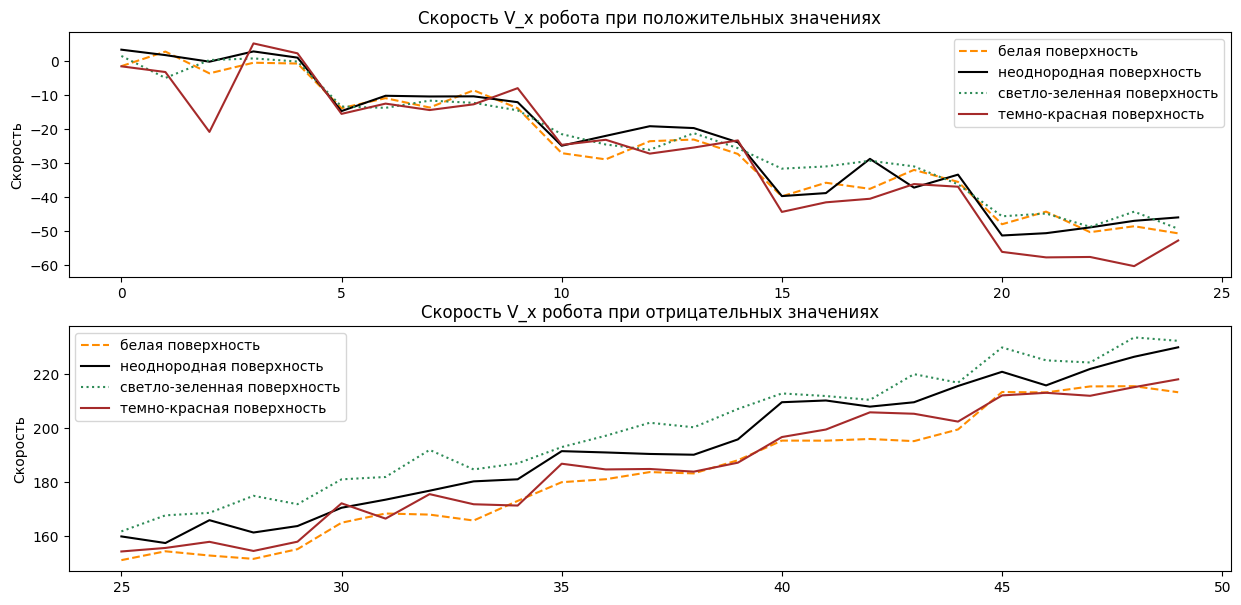

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_white_converted['v_white_x'][:25],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_velocity_white_darkred_lightgreen_converted[['v_x']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_light_green_converted[['v_light_green_x']][:25], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_plus, df_velocity_dark_red_converted[['v_dark_red_x']][:25], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_x робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_white_converted['v_white_x'][25:],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_velocity_white_darkred_lightgreen_converted[['v_x']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_light_green_converted[['v_light_green_x']][25:], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_minus, df_velocity_dark_red_converted[['v_dark_red_x']][25:], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_x робота при отрицательных значениях')
plt.legend()

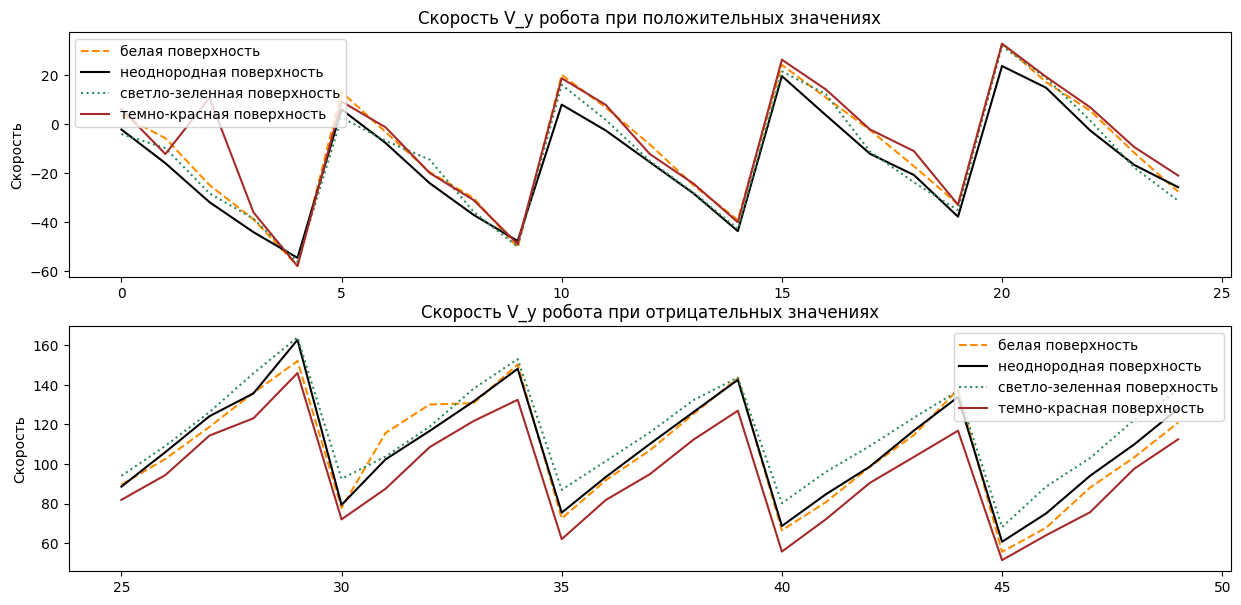

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_white_converted['v_white_y'][:25],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_velocity_white_darkred_lightgreen_converted[['v_y']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_light_green_converted[['v_light_green_y']][:25], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_plus, df_velocity_dark_red_converted[['v_dark_red_y']][:25], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_y робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_white_converted['v_white_y'][25:],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_velocity_white_darkred_lightgreen_converted[['v_y']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_light_green_converted[['v_light_green_y']][25:], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_minus, df_velocity_dark_red_converted[['v_dark_red_y']][25:], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_y робота при отрицательных значениях')
plt.legend()

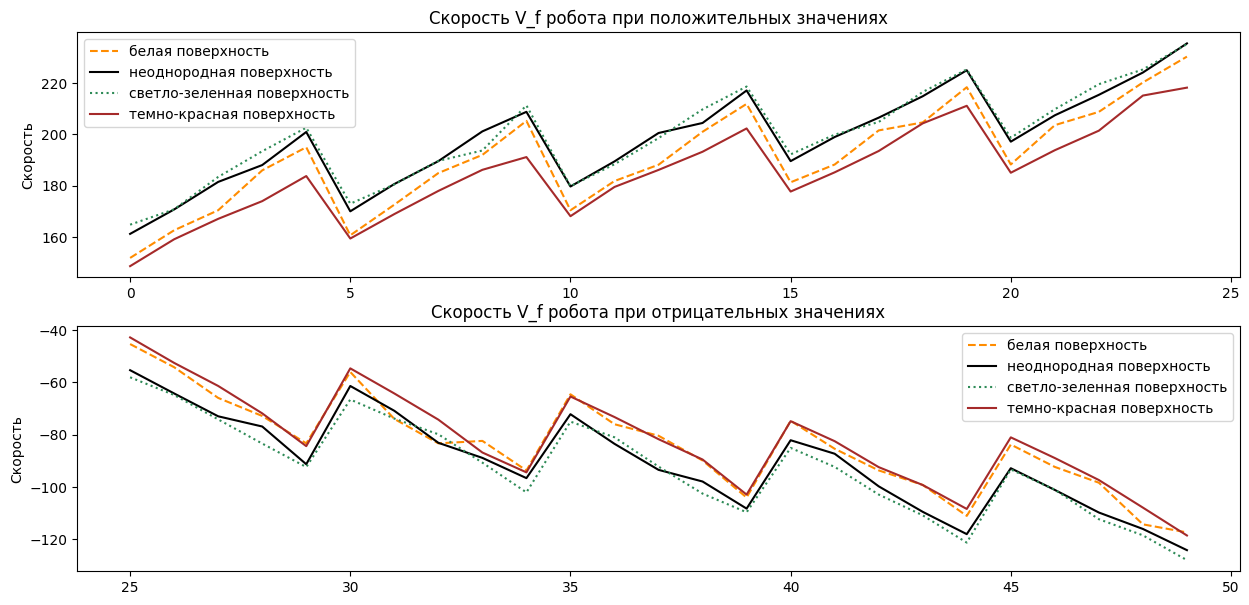

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_velocity_white_converted['v_white_f'][:25],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_velocity_white_darkred_lightgreen_converted[['v_f']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_velocity_light_green_converted[['v_light_green_f']][:25], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_plus, df_velocity_dark_red_converted[['v_dark_red_f']][:25], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_f робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_velocity_white_converted['v_white_f'][25:],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_velocity_white_darkred_lightgreen_converted[['v_f']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_velocity_light_green_converted[['v_light_green_f']][25:], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_minus, df_velocity_dark_red_converted[['v_dark_red_f']][25:], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Скорость')
plt.title('Скорость V_f робота при отрицательных значениях')
plt.legend()

### For Ix, Iy, If:

In [ ]:
df_current_white_darkred_lightgreen = pd.read_csv('data/dataset/dataset/current_white_darkred_lightgreen.csv')
df_current_white = pd.read_csv('data/dataset/dataset/current_white.csv')
df_current_dark_red = pd.read_csv('data/dataset/dataset/current_dark_red.csv')
df_current_light_green = pd.read_csv('data/dataset/dataset/current_light_green.csv')

df_current_white_darkred_lightgreen = df_current_white_darkred_lightgreen.drop(columns = 'Unnamed: 0')
df_current_white = df_current_white.drop(columns = 'Unnamed: 0')
df_current_dark_red = df_current_dark_red.drop(columns = 'Unnamed: 0')
df_current_light_green = df_current_light_green.drop(columns = 'Unnamed: 0')

df_current_white_darkred_lightgreen = df_current_white_darkred_lightgreen[['I1', 'I2', 'I3']]
df_current_white = df_current_white[['I1', 'I2', 'I3']]
df_current_dark_red = df_current_dark_red[['I1', 'I2', 'I3']]
df_current_light_green = df_current_light_green[['I1', 'I2', 'I3']]

In [ ]:
df_current_white = df_current_white.rename(columns = {'I3' : 'I3_white', 'I1' : 'I1_white', 'I2' : 'I2_white'})
df_current_dark_red = df_current_dark_red.rename(columns = {'I3' : 'I3_dark_red', 'I1' : 'I1_dark_red', 'I2' : 'I2_dark_red'})
df_current_light_green = df_current_light_green.rename(columns = {'I3' : 'I3_light_green', 'I1' : 'I1_light_green', 'I2' : 'I2_light_green'})

In [ ]:
df_current_dark_red_converted = convertor(df_current_dark_red)
df_current_dark_red_converted.columns = ['I_dark_red_x', 'I_dark_red_y', 'I_dark_red_f']

df_current_white_converted = convertor(df_current_white)
df_current_white_converted.columns = ['I_white_x', 'I_white_y', 'I_white_f']

df_current_light_green_converted = convertor(df_current_light_green)
df_current_light_green_converted.columns = ['I_light_green_x', 'I_light_green_y', 'I_light_green_f']

df_current_white_darkred_lightgreen_converted = convertor(df_current_white_darkred_lightgreen)
df_current_white_darkred_lightgreen_converted.columns = ['I_x', 'I_y', 'I_f']

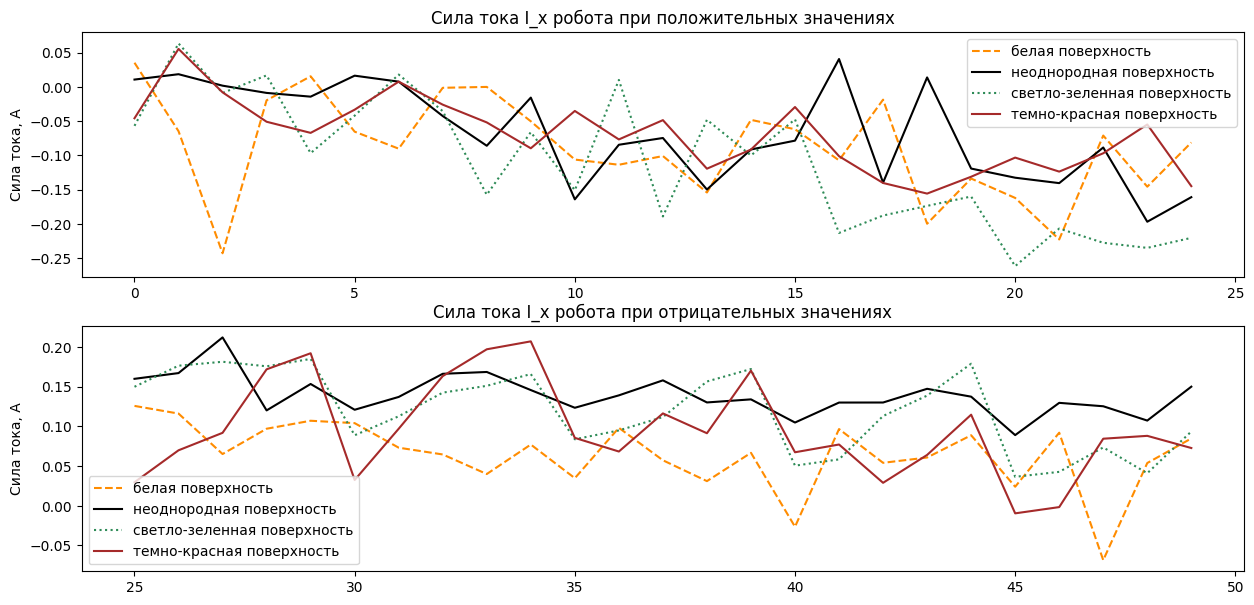

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_white_converted['I_white_x'][:25],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_current_white_darkred_lightgreen_converted[['I_x']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_light_green_converted[['I_light_green_x']][:25], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_plus, df_current_dark_red_converted[['I_dark_red_x']][:25], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Сила тока, A')
plt.title('Сила тока I_x робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_white_converted['I_white_x'][25:],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_current_white_darkred_lightgreen_converted[['I_x']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_light_green_converted[['I_light_green_x']][25:], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_minus, df_current_dark_red_converted[['I_dark_red_x']][25:], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Сила тока, A')
plt.title('Сила тока I_x робота при отрицательных значениях')
plt.legend()

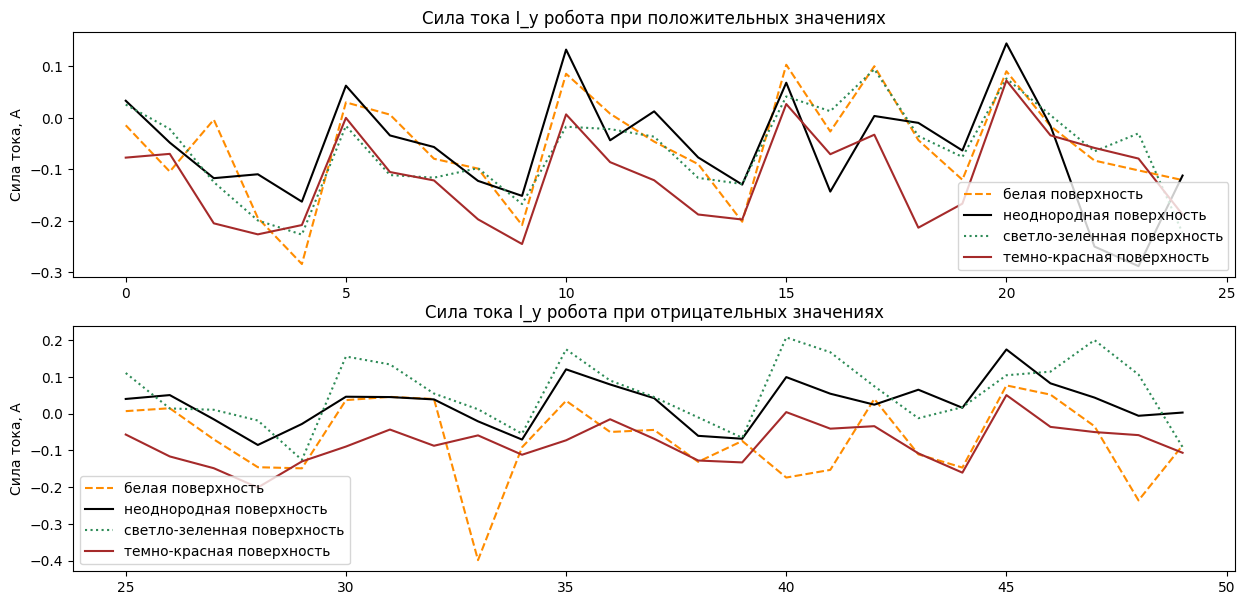

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_white_converted['I_white_y'][:25],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_current_white_darkred_lightgreen_converted[['I_y']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_light_green_converted[['I_light_green_y']][:25], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_plus, df_current_dark_red_converted[['I_dark_red_y']][:25], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Сила тока, A')
plt.title('Сила тока I_y робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_white_converted['I_white_y'][25:],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_current_white_darkred_lightgreen_converted[['I_y']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_light_green_converted[['I_light_green_y']][25:], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_minus, df_current_dark_red_converted[['I_dark_red_y']][25:], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Сила тока, A')
plt.title('Сила тока I_y робота при отрицательных значениях')
plt.legend()

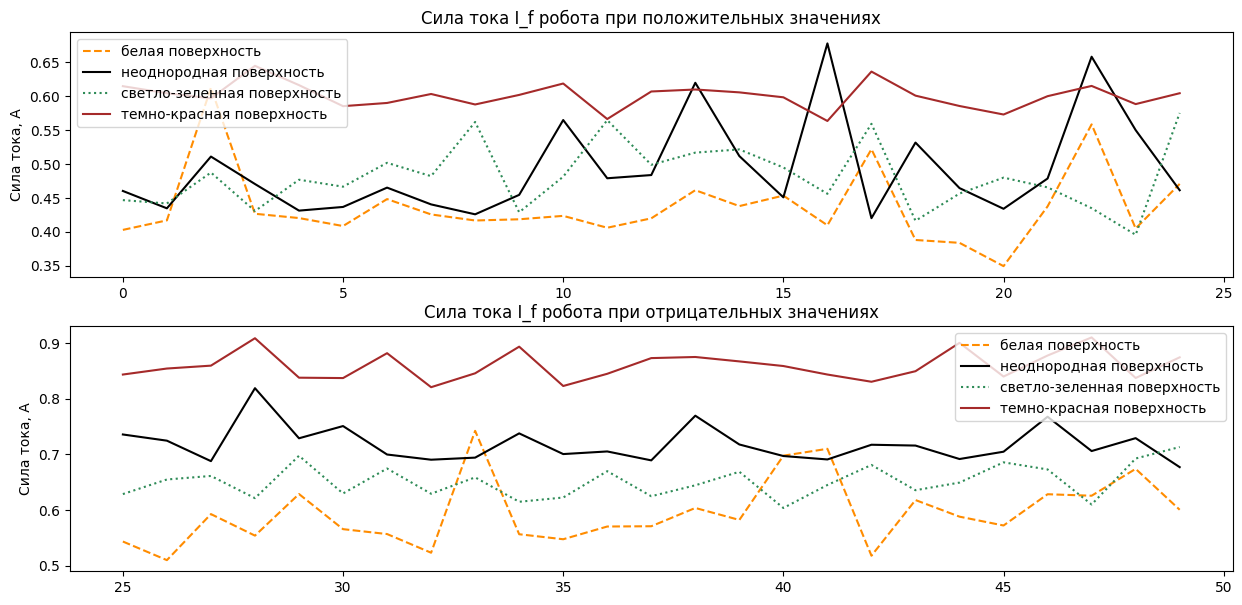

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(2, 1, 1)
plt.plot(index_plus, df_current_white_converted['I_white_f'][:25],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_current_white_darkred_lightgreen_converted[['I_f']][:25], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_plus, df_current_light_green_converted[['I_light_green_f']][:25], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_plus, df_current_dark_red_converted[['I_dark_red_f']][:25], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Сила тока, A')
plt.title('Сила тока I_f робота при положительных значениях')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(index_minus, df_current_white_converted['I_white_f'][25:],'--', color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_current_white_darkred_lightgreen_converted[['I_f']][25:], color = 'black', label = 'неоднородная поверхность')
plt.plot(index_minus, df_current_light_green_converted[['I_light_green_f']][25:], ':', color = 'seagreen', label = 'светло-зеленная поверхность')
plt.plot(index_minus, df_current_dark_red_converted[['I_dark_red_f']][25:], color = 'brown', label = 'темно-красная поверхность')
plt.ylabel('Сила тока, A')
plt.title('Сила тока I_f робота при отрицательных значениях')
plt.legend()

# 5. Gyro and accel

In [ ]:
df_accel_and_gyro_white_darkred_lightgreen = pd.read_csv('data/dataset/dataset/accel_and_gyro_white_darkred_lightgreen.csv')
df_accel_and_gyro_white = pd.read_csv('data/dataset/dataset/accel_and_gyro_white.csv')
df_accel_and_gyro_dark_red = pd.read_csv('data/dataset/dataset/accel_and_gyro_dark_red.csv')
df_accel_and_gyro_light_green = pd.read_csv('data/dataset/dataset/accel_and_gyro_light_green.csv')


## When w1, w2 > 0

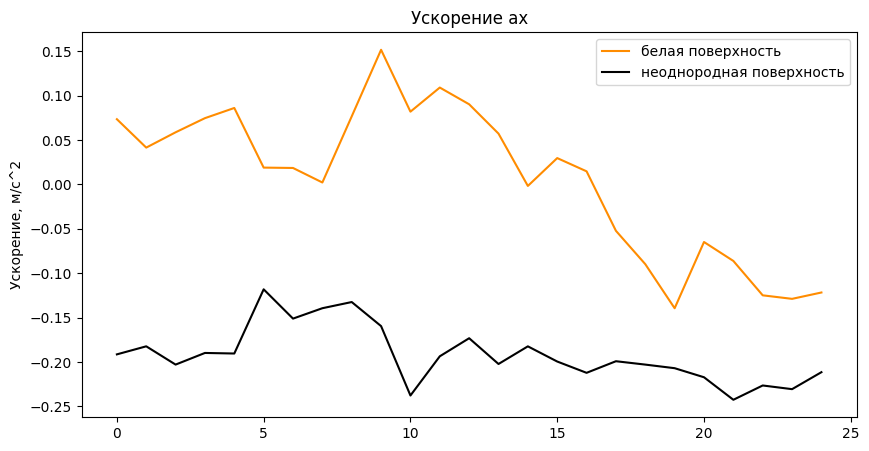

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_accel_and_gyro_white['ax'][:25], color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_accel_and_gyro_white_darkred_lightgreen[['ax']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Ускорение, м/с^2')
plt.title('Ускорение ax')
plt.legend()

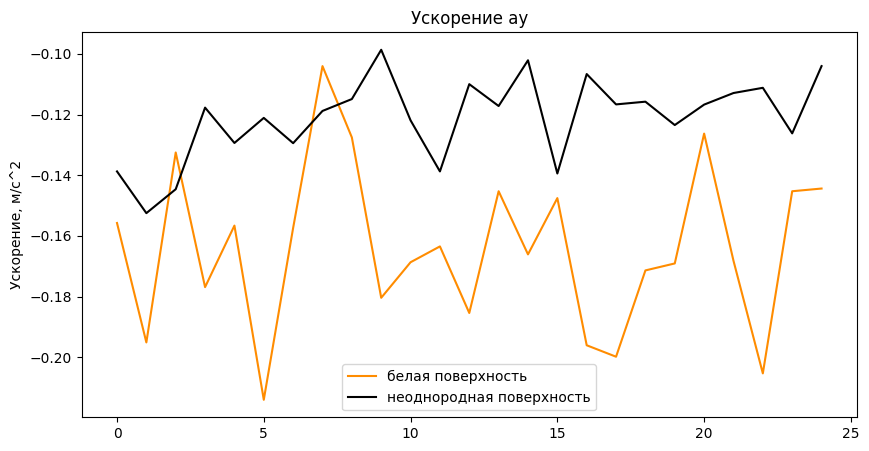

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_accel_and_gyro_white['ay'][:25], color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_accel_and_gyro_white_darkred_lightgreen[['ay']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Ускорение, м/с^2')
plt.title('Ускорение ay')
plt.legend()

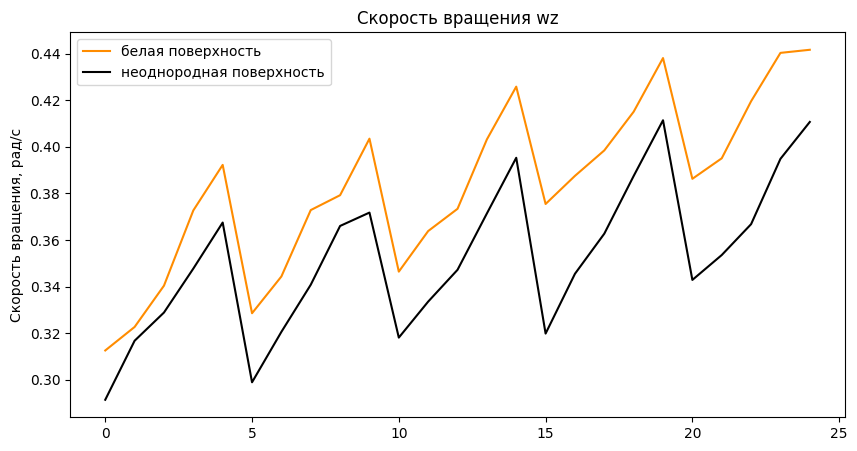

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_plus, df_accel_and_gyro_white['wz'][:25], color = 'darkorange', label = 'белая поверхность')
plt.plot(index_plus, df_accel_and_gyro_white_darkred_lightgreen[['wz']][:25], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения, рад/с')
plt.title('Скорость вращения wz')
plt.legend()

## When w1, w2 < 0

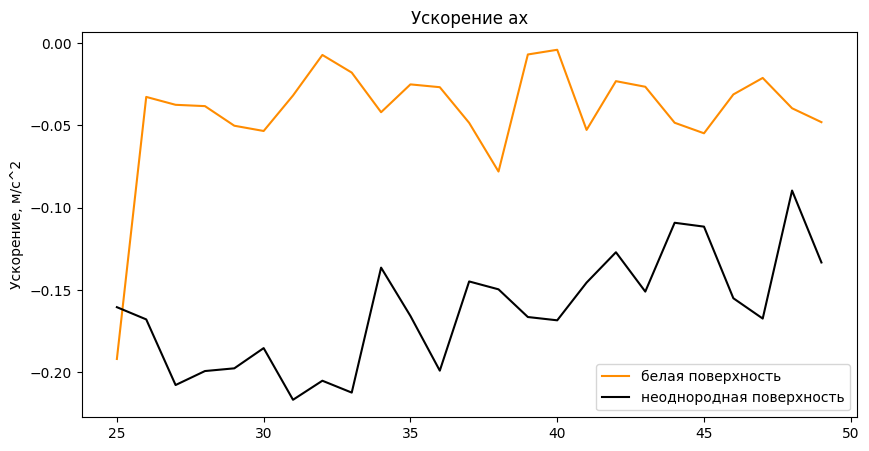

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_accel_and_gyro_white['ax'][25:], color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_accel_and_gyro_white_darkred_lightgreen[['ax']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Ускорение, м/с^2')
plt.title('Ускорение ax')
plt.legend()

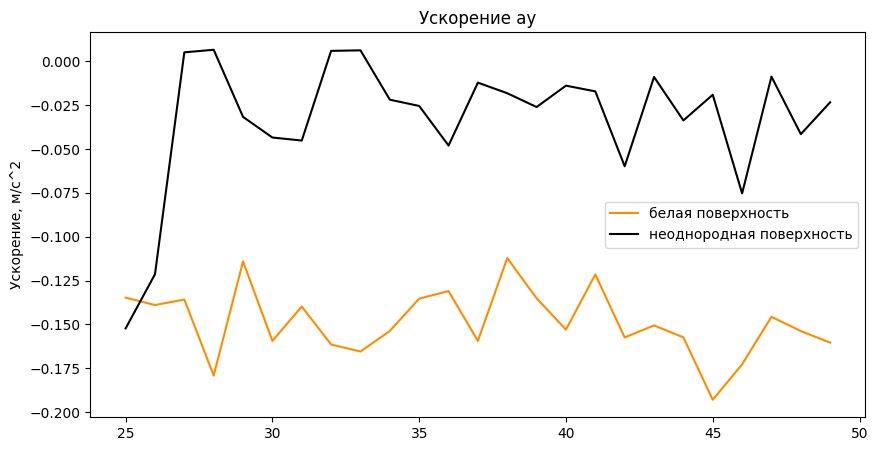

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_accel_and_gyro_white['ay'][25:], color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_accel_and_gyro_white_darkred_lightgreen[['ay']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Ускорение, м/с^2')
plt.title('Ускорение ay')
plt.legend()

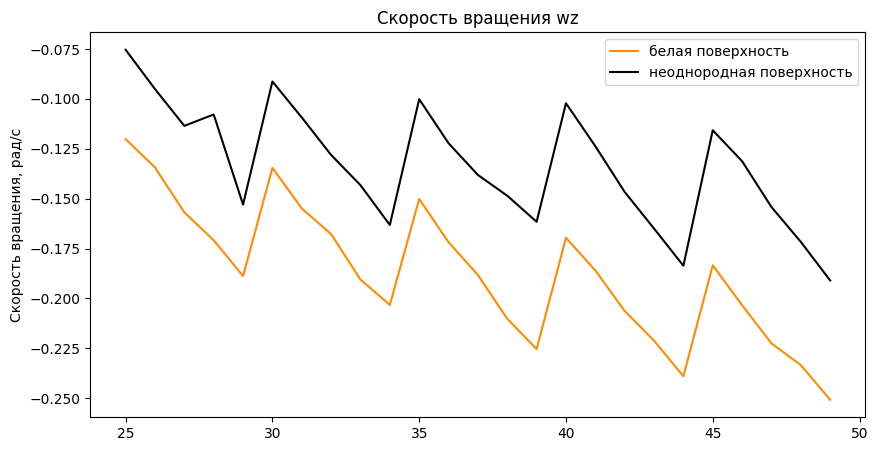

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(index_minus, df_accel_and_gyro_white['wz'][25:], color = 'darkorange', label = 'белая поверхность')
plt.plot(index_minus, df_accel_and_gyro_white_darkred_lightgreen[['wz']][25:], color = 'black', label = 'неоднородная поверхность')
plt.ylabel('Скорость вращения, рад/с')
plt.title('Скорость вращения wz')
plt.legend()